In [1051]:
import pandas as pd

In [1052]:
df = pd.read_csv('data/matches.csv')

## We have to clean it first 

In [1053]:
def join_dates(row):
    if row['date'] != None:
        return row['date']
    else:
        return row['estimatedDate']

In [1054]:
df['date'] = df.apply(lambda row: join_dates(row), axis = 1)

In [1055]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [1056]:
df.loc[df['location'] == 'Bazaly', 'location'] = 'Bazaly, Ostrava'

In [1057]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [1058]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian F.C.'

In [1059]:
sjednoceni = {
    'Praha': 'Prague',
    'Chişinău': 'Chisinau',
    'Chișinău': 'Chisinau',
    'Warszawa': 'Warsaw',
    'Moskva': 'Moscow',
    'Münich':'Munich',
    'Kiev': 'Kyiv',
    'Spartak Prague Sokolovo': 'Sparta Prague',
    'Bohemians ČKD Prague':'Bohemians Prague',
    'FC Carl Zeiss Jena': 'Carl Zeiss Jena',
    'F.C. Barcelona': 'Barcelona',
    'Internazionale': 'Inter Milan',
    '1. FC Kaiserslautern':'Kaiserslautern',
    'FC Sochaux':'Sochaux',
    'Zenit St Petersburg': 'Zenit Saint Petersburg',
    'AaB': 'Aalborg BK',
    'FK Partizan':'Partizan'
        }

In [1060]:
for puvodni, spravny in sjednoceni.items():
    df['homeTeam'] = df['homeTeam'].apply(lambda x: str(x).replace(puvodni, spravny))
    df['awayTeam'] = df['awayTeam'].apply(lambda x: str(x).replace(puvodni, spravny))

In [1061]:
intertoto = df[df['competition'] == 'Intertoto']

In [1062]:
icfc = df[df['competition'] == 'ICFC']

In [1063]:
df = df[df['competition'] != 'Intertoto']
df = df[df['competition'] != 'ICFC']
df = df[~df['score'].str.contains('Annulled',na=False)]

In [1064]:
allseasons = df['season'].drop_duplicates().to_list()
allseasons.sort()

In [1065]:
df[df['season'] == '1958-60']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city


## Let's count the remaining teams for every stage/season/cup

In [1066]:
compdates = df[['season','competition','date','homeTeam','awayTeam','phase']]

In [1067]:
compdates

,season,competition,date,homeTeam,awayTeam,phase
23,1954-55,UCL,1955-09-04,Sporting CP,Partizan,first round
24,1954-55,UCL,1955-09-07,Vörös Lobogó,Anderlecht,first round
25,1954-55,UCL,1955-09-08,Servette,Real Madrid,first round
26,1954-55,UCL,1955-09-14,Rot-Weiss Essen,Hibernian,first round
27,1954-55,UCL,1955-09-20,Djurgården,Gwardia Warsaw,first round
...,...,...,...,...,...,...
27600,2024-25,UECL,2024-08-06,Noah,AEK Athens,third qualifying round
27601,2024-25,UECL,2024-08-07,BK Häcken,Paide Linnameeskond,third qualifying round
27602,2024-25,UECL,2024-08-07,Copenhagen,Baník Ostrava,third qualifying round
27603,2024-25,UECL,2024-08-07,Paks,Mornar Bar,third qualifying round


In [1068]:
first_match = pd.DataFrame(compdates.groupby(['season','competition','phase'])['date'].min()).reset_index()
first_match

,season,competition,phase,date
0,1954-55,UCL,final,1956-06-13
1,1954-55,UCL,first round,1955-09-04
2,1954-55,UCL,quarter-finals,1955-11-23
3,1954-55,UCL,semi-finals,1956-04-04
4,1955-56,UCL,final,1957-05-30
...,...,...,...,...
1234,2024-25,UCL,second qualifying round,2024-07-23
1235,2024-25,UCL,third qualifying round,2024-08-06
1236,2024-25,UECL,first qualifying round,2024-07-10
1237,2024-25,UECL,second qualifying round,2024-07-23


In [1069]:
def remaining_phases(row):
    return df[(df['date'] >= row['date']) & (df['competition'] == row['competition']) & (df['season'] == row['season'])]['phase'].drop_duplicates().to_list()

In [1070]:
first_match['remaining_phases'] = first_match.apply(lambda x: remaining_phases(x), axis=1)

In [1071]:
first_match

,season,competition,phase,date,remaining_phases
0,1954-55,UCL,final,1956-06-13,[final]
1,1954-55,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]"
2,1954-55,UCL,quarter-finals,1955-11-23,"[quarter-finals, first round, semi-finals, final]"
3,1954-55,UCL,semi-finals,1956-04-04,"[semi-finals, final]"
4,1955-56,UCL,final,1957-05-30,[final]
...,...,...,...,...,...
1234,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"
1235,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round]
1236,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou..."
1237,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"


In [1072]:
def remaining_teams(row):
    rem_phases = row['remaining_phases']
    remaining_teams = []
    for r in rem_phases:
        ht = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['homeTeam'].drop_duplicates().to_list()
        at = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['awayTeam'].drop_duplicates().to_list()
        remaining_teams = remaining_teams + ht + at
    return list(set(remaining_teams))

In [1073]:
first_match['remaining_teams'] = first_match.apply(lambda x: remaining_teams(x), axis=1)

In [1074]:
first_match['remaining_teams_count'] = first_match['remaining_teams'].apply(lambda x: len(x))

In [1075]:
df[(df['season'] == '1980-81') & (df['competition'] == 'EL')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city
4638,EL,1981-09-15,0-1,Bohemians,Czechoslovakia,Bohemians_1905,Valencia,Spain,Valencia_CF,V Dolicku,first round,NaN,NaN,1981%E2%80%9382 UEFA Cup,1980-81,V Dolicku
4639,EL,1981-09-15,4-0,Neuchâtel Xamax,Switzerland,Neuch%C3%A2tel_Xamax,Sparta Prague,Czechoslovakia,AC_Sparta_Prague,"Stade de la Maladière, Neuchâtel",first round,13000.0,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Neuchâtel
4640,EL,1981-09-16,1-0,Kaiserslautern,West Germany,1._FC_Kaiserslautern,Akademik Sofia,Bulgaria,PFC_Akademik_Sofia,"Fritz-Walter-Stadion, Kaiserslautern",first round,NaN,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Kaiserslautern
4641,EL,1981-09-16,3-1,1. FC Magdeburg,East Germany,1._FC_Magdeburg,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,"Ernst Grube Stadium, Magdeburg",first round,NaN,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Magdeburg
4642,EL,1981-09-16,1-1,APOEL,Cyprus,APOEL_FC,Argeș Pitești,Romania,FC_Arge%C8%99_Pite%C8%99ti,"Makario Stadium, Nicosia",first round,10000.0,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Nicosia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,EL,1982-04-07,2-1,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,Hamburger SV,West Germany,Hamburger_SV,"Čair Stadium, Niš",semi-finals,NaN,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Niš
4760,EL,1982-04-21,5-1,Hamburger SV,West Germany,Hamburger_SV,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,"Volksparkstadion, Hamburg",semi-finals,NaN,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Hamburg
4761,EL,1982-04-21,2-1,IFK Göteborg,Sweden,IFK_G%C3%B6teborg,Kaiserslautern,West Germany,1._FC_Kaiserslautern,"Ullevi, Gothenburg",semi-finals,50053.0,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Gothenburg
4762,EL,1982-05-05,1-0,IFK Göteborg,Sweden,IFK_G%C3%B6teborg,Hamburger SV,West Germany,Hamburger_SV,"Ullevi, Gothenburg",final,42548.0,NaN,1981%E2%80%9382 UEFA Cup,1980-81,Gothenburg


In [1076]:
first_match[first_match['remaining_teams_count'] == 5]['remaining_teams'].to_list()

[['Standard Liège', 'Hamburg', 'Bayern Munich', 'Cardiff City', 'Milan']]

In [1077]:
df[(df['competition'] == 'CWC')].groupby("season").size()

season
1959-60    18
1960-61    45
1961-62    50
1962-63    61
1963-64    58
1964-65    61
1965-66    61
1966-67    63
1967-68    53
1968-69    65
1969-70    66
1970-71    67
1971-72    60
1972-73    65
1973-74    61
1974-75    61
1975-76    63
1976-77    63
1977-78    69
1978-79    65
1979-80    44
1980-81    63
1981-82    65
1982-83    63
1983-84    62
1984-85    59
1985-86    61
1986-87    62
1987-88    63
1988-89    63
1989-90    63
1990-91    65
1991-92    69
1992-93    83
1993-94    85
1994-95    93
1995-96    95
1996-97    91
1997-98    95
dtype: int64

In [1078]:
df[(df['competition'] == 'UCL') & (df['phase'] =='quarter-finals')].groupby("season").size().reindex(allseasons).head(50)

season
1954-55    8.0
1955-56    8.0
1956-57    8.0
1957-58    8.0
1958-59    8.0
1959-60    8.0
1960-61    9.0
1961-62    8.0
1962-63    8.0
1963-64    9.0
1964-65    8.0
1965-66    8.0
1966-67    9.0
1967-68    8.0
1968-69    8.0
1969-70    8.0
1970-71    8.0
1971-72    8.0
1972-73    8.0
1973-74    8.0
1974-75    8.0
1975-76    8.0
1976-77    8.0
1977-78    8.0
1978-79    8.0
1979-80    8.0
1980-81    8.0
1981-82    8.0
1982-83    8.0
1983-84    8.0
1984-85    8.0
1985-86    8.0
1986-87    8.0
1987-88    8.0
1988-89    8.0
1989-90    8.0
1990-91    NaN
1991-92    NaN
1992-93    NaN
1993-94    8.0
1994-95    NaN
1995-96    8.0
1996-97    8.0
1997-98    8.0
1998-99    8.0
1999-00    8.0
2000-01    8.0
2001-02    8.0
2002-03    8.0
2003-04    8.0
dtype: float64

In [1079]:
df[(df['competition'] == 'CWC') & (df['phase'] =='quarter-finals')].groupby("season").size().reindex(allseasons).head(50)

season
1954-55    NaN
1955-56    NaN
1956-57    NaN
1957-58    NaN
1958-59    NaN
1959-60    8.0
1960-61    1.0
1961-62    8.0
1962-63    8.0
1963-64    8.0
1964-65    8.0
1965-66    8.0
1966-67    9.0
1967-68    8.0
1968-69    8.0
1969-70    8.0
1970-71    8.0
1971-72    7.0
1972-73    8.0
1973-74    8.0
1974-75    8.0
1975-76    8.0
1976-77    8.0
1977-78    8.0
1978-79    8.0
1979-80    8.0
1980-81    8.0
1981-82    8.0
1982-83    8.0
1983-84    8.0
1984-85    8.0
1985-86    8.0
1986-87    7.0
1987-88    8.0
1988-89    8.0
1989-90    8.0
1990-91    8.0
1991-92    8.0
1992-93    8.0
1993-94    8.0
1994-95    8.0
1995-96    8.0
1996-97    8.0
1997-98    8.0
1998-99    NaN
1999-00    NaN
2000-01    NaN
2001-02    NaN
2002-03    NaN
2003-04    NaN
dtype: float64

In [1080]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7])]

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
73,1963-64,CWC,play-off,1965-05-05,"[play-off, final]","[1860 Munich, West Ham United, Torino]",3
106,1966-67,CWC,play-offs,1968-03-20,"[play-offs, semi-finals, final]","[Standard Liège, Hamburg, Bayern Munich, Cardi...",5
128,1968-69,CWC,play-off,1970-04-22,"[play-off, final]","[Górnik Zabrze, Manchester City, Roma]",3


In [1081]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])]

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
5,1955-56,UCL,first round,1956-10-17,"[first round, play-off, quarter-finals, semi-f...","[Rapid Wien, Budapest Honvéd, CDNA Sofia, Manc...",17
17,1957-58,UCL,first round,1958-10-29,"[first round, play-off, quarter-finals, semi-f...","[CDNA Sofia, Jeunesse Esch, Wismut Karl-Marx-S...",19
20,1957-58,UCL,quarter-finals,1959-02-04,"[quarter-finals, play-off, semi-finals, final]","[Standard Liège, Petrolul Ploiești, Atlético M...",13
21,1957-58,UCL,semi-finals,1959-04-15,"[semi-finals, play-off, final]","[Petrolul Ploiești, Atlético Madrid, CDNA Sofi...",11
39,1960-61,CWC,preliminary round,1961-09-07,"[preliminary round, first round, nan, semi-fin...","[Dynamo Žilina, Leixões, FK Vardar, AGF, Ajax,...",23
49,1961-62,CWC,first round,1962-10-18,"[first round, play-off, quarter-finals, semi-f...","[Boldklubben 1909, Bangor City, Botev Plovdiv,...",17
50,1961-62,CWC,play-off,1962-10-10,"[play-off, first round, quarter-finals, semi-f...","[Boldklubben 1909, Bangor City, Botev Plovdiv,...",17
64,1962-63,CWC,second round,1963-11-13,"[second round, play-off, quarter-finals, semi-...","[Borough United, Motor Zwickau, Zagłębie Sosno...",19
73,1963-64,CWC,play-off,1965-05-05,"[play-off, final]","[1860 Munich, West Ham United, Torino]",3
106,1966-67,CWC,play-offs,1968-03-20,"[play-offs, semi-finals, final]","[Standard Liège, Hamburg, Bayern Munich, Cardi...",5


In [1082]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])].iloc[1]['remaining_teams']

['CDNA Sofia',
 'Jeunesse Esch',
 'Wismut Karl-Marx-Stadt',
 'Standard Liège',
 'Schalke 04',
 'Sporting CP',
 'MTK Budapest',
 'Helsingin Palloseura',
 'Wolverhampton Wanderers',
 'Beşiktaş',
 'Petrolul Ploiești',
 'Atlético Madrid',
 'Dukla Prague',
 'Reims',
 'IFK Göteborg',
 'Wiener Sport-Club',
 'Young Boys',
 'KB',
 'Real Madrid']

In [1083]:
df[(df['season'] == '1995-96') & (df['homeTeam'] == 'Dynamo Kyiv')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city
8945,EL,1996-09-10,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Neuchâtel Xamax,Switzerland,Neuch%C3%A2tel_Xamax_FCS,"Olimpiyskiy National Sports Complex, Kyiv",first round,60000.0,NaN,1996%E2%80%9397 UEFA Cup,1995-96,Kyiv
9208,UCL,1996-08-21,2-4,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Rapid Wien,Austria,SK_Rapid_Wien,"NSK Olimpiyskyi, Kyiv",NaN,70000.0,NaN,1996%E2%80%9397 UEFA Champions League qualifyi...,1995-96,Kyiv


In [1084]:
first_match[first_match['remaining_teams_count'].isin([1,3,5,7,9,11,13,15,17,19,21,23])].iloc[-2]['remaining_teams']

['Dynamo Kyiv',
 'Brøndby',
 'Beşiktaş',
 'Porto',
 'Rosenborg',
 'Steaua București',
 'Red Star Belgrade',
 'Juventus',
 'Bayern Munich',
 'Austria Wien',
 'Vítkovice',
 'BFC Dynamo',
 'Celtic',
 'Anderlecht',
 'Real Madrid']

In [1085]:
first_match

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
0,1954-55,UCL,final,1956-06-13,[final],"[Reims, Real Madrid]",2
1,1954-55,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]","[Rapid Wien, PSV Eindhoven, Milan, Djurgården,...",16
2,1954-55,UCL,quarter-finals,1955-11-23,"[quarter-finals, first round, semi-finals, final]","[Rapid Wien, PSV Eindhoven, Milan, Djurgården,...",16
3,1954-55,UCL,semi-finals,1956-04-04,"[semi-finals, final]","[Reims, Hibernian, Real Madrid, Milan]",4
4,1955-56,UCL,final,1957-05-30,[final],"[Fiorentina, Real Madrid]",2
...,...,...,...,...,...,...,...
1234,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[Dynamo Kyiv, Lille, Twente, RFS, Lincoln Red ...",34
1235,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round],"[Dynamo Kyiv, Lille, Twente, Qarabağ, Slovan B...",20
1236,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou...","[Marsaxlokk, Crusaders, Sabah, Maribor, Ararat...",123
1237,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[Sabah, Maribor, Ararat-Armenia, Bravo, Puskás...",98


In [1088]:
df = df.merge(first_match[['competition','season','phase','remaining_teams_count']], on=['competition','season','phase'], how='outer')

In [1089]:
df.loc[df['season'] == '2024-25', 'remaining_teams_count'] = None

In [1090]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
0,CWC,1961-05-17,0-2,Rangers,Scotland,Rangers_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Ibrox Park, Glasgow",final,80000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1959-60,Glasgow,2.0
1,CWC,1961-05-27,2-1,Fiorentina,Italy,NaN,Rangers,Scotland,NaN,"Stadio Comunale, Florence",final,27000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1959-60,Florence,2.0
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",preliminary round,8000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1959-60,Frankfurt,10.0
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",preliminary round,15000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1959-60,Brno,10.0
4,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",preliminary round,36000.0,NaN,1960%E2%80%9361 European Cup Winners%27 Cup,1959-60,Glasgow,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25418,UECL,2024-08-06,3-1,Noah,Armenia,FC_Noah,AEK Athens,Greece,AEK_Athens_F.C.,"Abovyan City Stadium, Abovyan",third qualifying round,2800.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Abovyan,NaN
25419,UECL,2024-08-07,6-1,BK Häcken,Sweden,BK_H%C3%A4cken,Paide Linnameeskond,Estonia,Paide_Linnameeskond,"Bravida Arena, Gothenburg",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Gothenburg,NaN
25420,UECL,2024-08-07,1-0,Copenhagen,Denmark,F.C._Copenhagen,Baník Ostrava,Czech Republic,FC_Ban%C3%ADk_Ostrava,"Parken Stadium, Copenhagen",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Copenhagen,NaN
25421,UECL,2024-08-07,3-0,Paks,Hungary,Paksi_SE,Mornar Bar,Montenegro,FK_Mornar,"Fehérvári úti Stadion, Paks",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Paks,NaN


## Better to check for errors

<Axes: xlabel='season'>

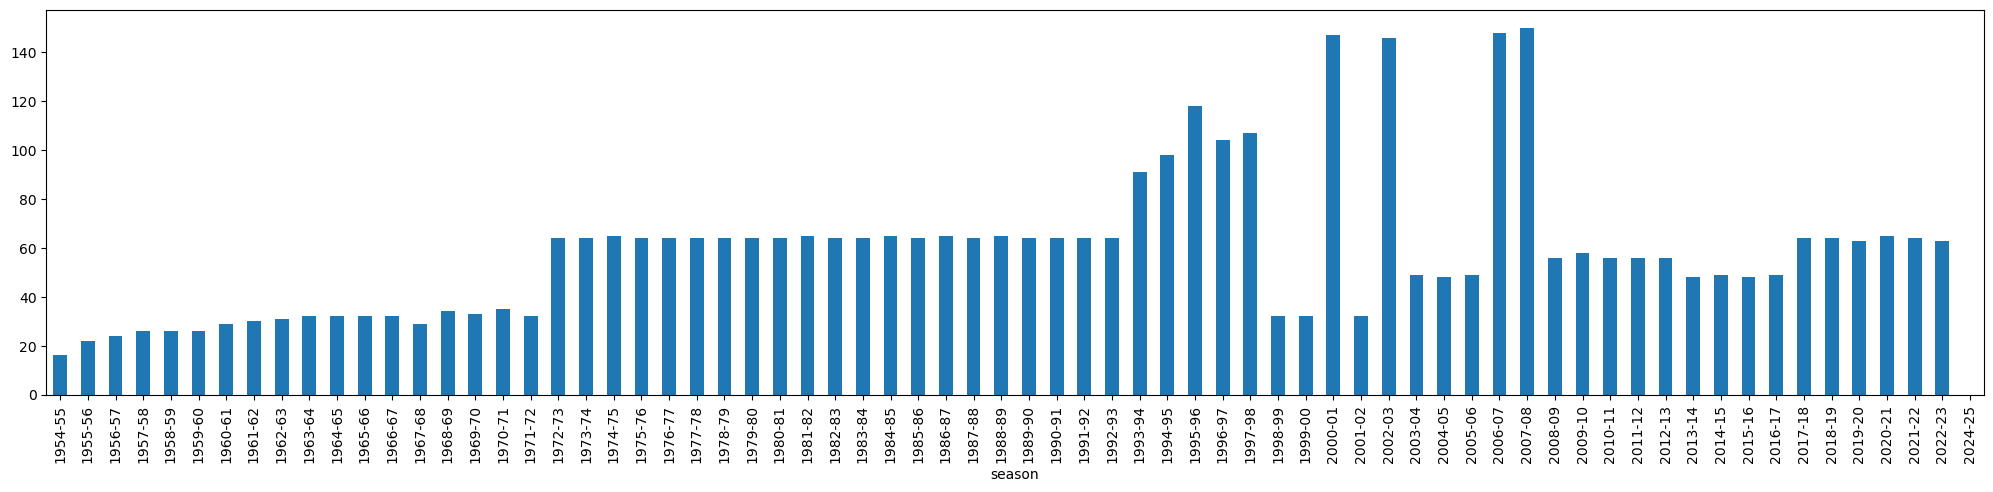

In [1091]:
df.groupby('season')['remaining_teams_count'].max().plot.bar(figsize=(25,5))

In [1092]:
df.groupby('remaining_teams_count').size().nlargest(16)

remaining_teams_count
32.0     4859
16.0     1747
64.0     1219
8.0      1019
49.0      850
33.0      652
48.0      624
56.0      624
4.0       494
31.0      396
65.0      388
34.0      371
105.0     255
24.0      228
2.0       183
58.0      174
dtype: int64

## Let's find all Eastern European clubs

In [1093]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [1094]:
easternClubs_wo_Germany = df[df['homeTeamCountry'].isin(easternCountries)]['homeTeam'].to_list()

In [1095]:
easternGermanUrls = ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [1096]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeam'].drop_duplicates().to_list() + df[df['homeTeamUrl'].isin(easternGermanUrls)]['homeTeam'].drop_duplicates().to_list()

In [1097]:
easternClubs = easternClubs_wo_Germany + easternGermanClubs

In [1098]:
east = df[df['homeTeam'].isin(easternClubs)]
east2 =  df[df['homeTeam'].isin(easternClubs) | df['awayTeam'].isin(easternClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

## Now for some basic exploration

<Axes: xlabel='season'>

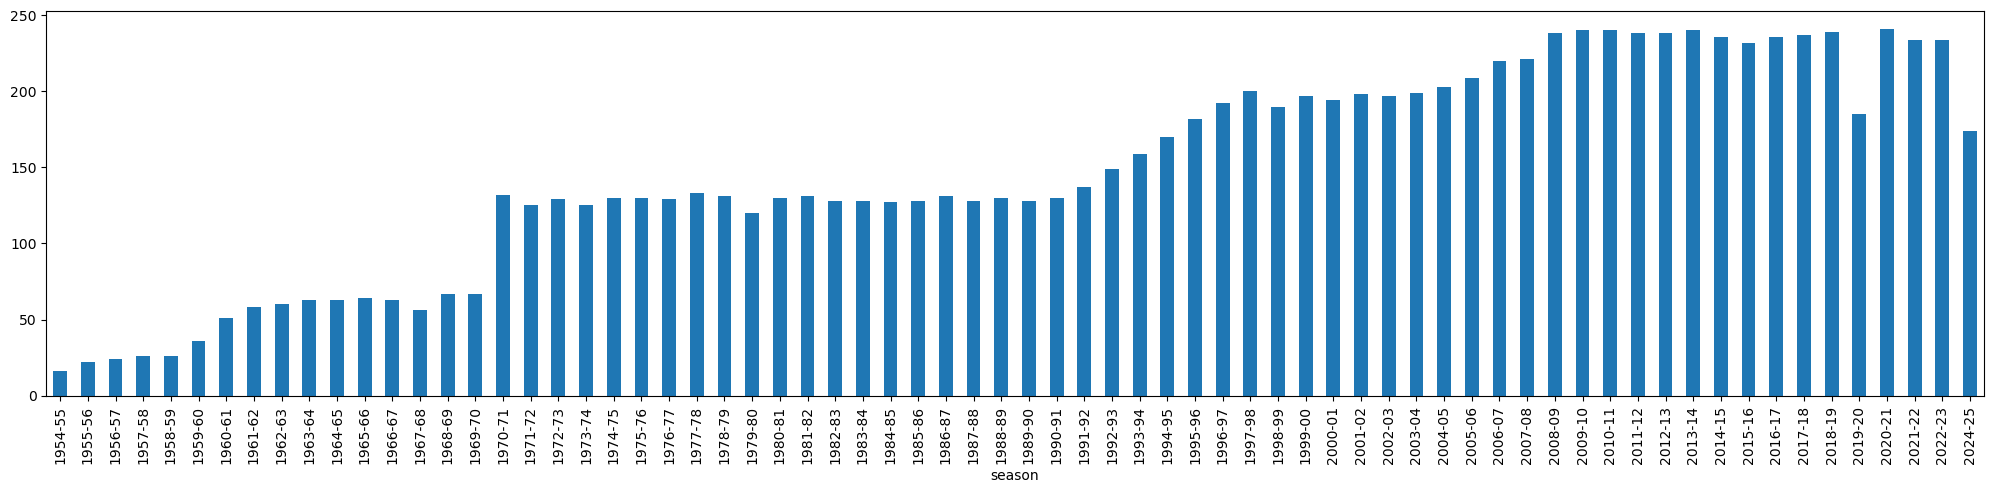

In [1099]:
df.groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

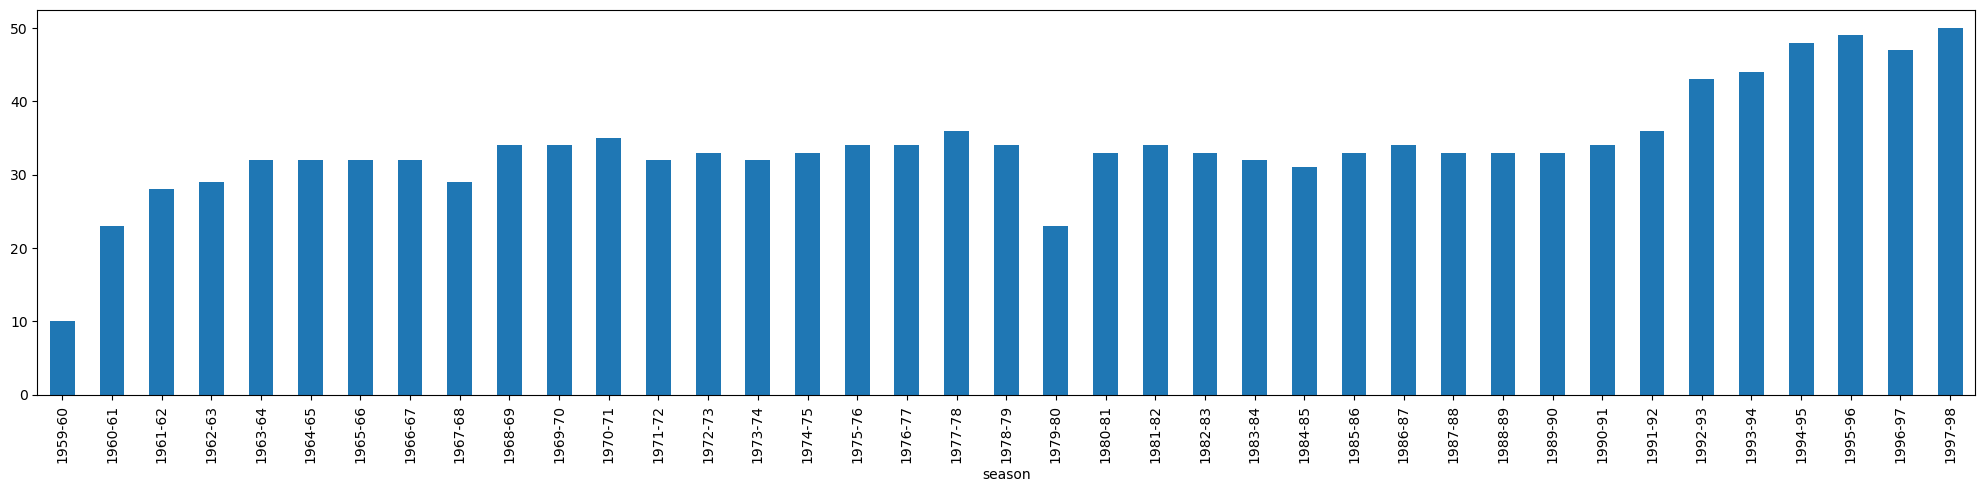

In [1100]:
df[df['competition'] == 'CWC'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

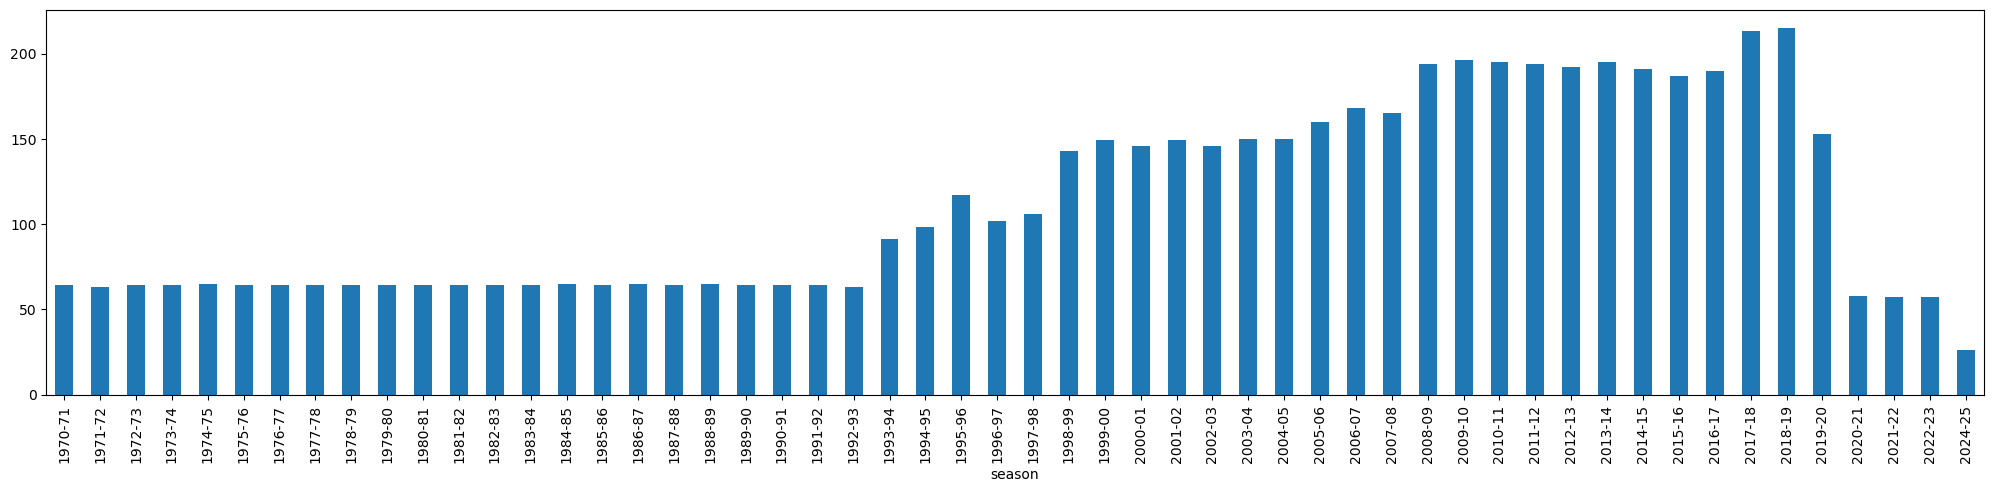

In [1101]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

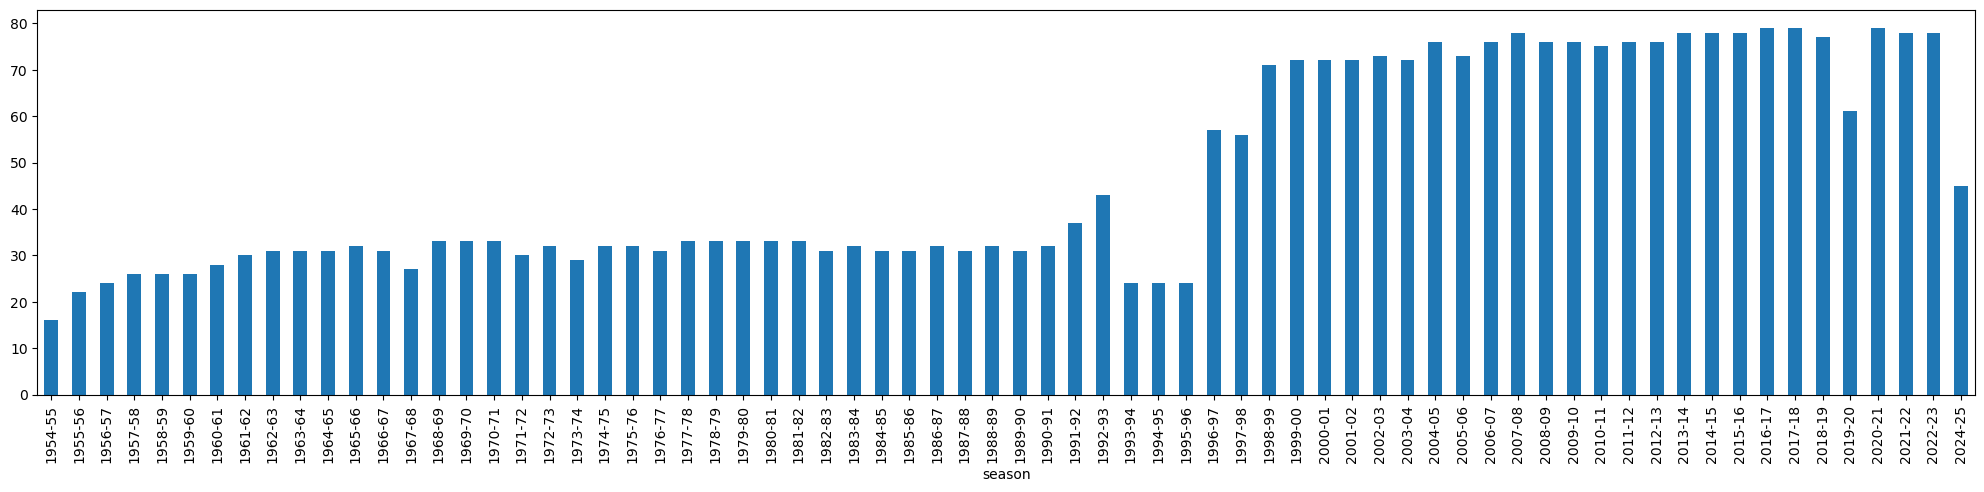

In [1102]:
df[df['competition'] == 'UCL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [1103]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(10)

homeTeam
Dynamo Kyiv          130
Red Star Belgrade     79
Shakhtar Donetsk      79
Sparta Prague         76
Steaua București      70
Dinamo Zagreb         67
Spartak Moscow        61
Partizan              53
BATE Borisov          52
CSKA Moscow           52
dtype: int64

In [1104]:
east.groupby('city').size().nlargest(60)

city
Belgrade            357
Moscow              338
Prague              335
Bucharest           331
Sofia               302
Budapest            289
Kyiv                222
Baku                186
Zagreb              175
Bratislava          142
Skopje              141
Warsaw              141
Yerevan             138
Tallinn             129
Tirana              108
Donetsk              98
Split                97
Tbilisi              93
Riga                 92
Maribor              91
Minsk                89
Tiraspol             89
Saint Petersburg     88
Sarajevo             87
Chișinău             77
Vilnius              70
Podgorica            67
Plzeň                62
Poznań               62
Razgrad              61
Kraków               60
Cluj-Napoca          59
Leipzig              59
Trnava               57
Ljubljana            56
Rijeka               50
Barysaw              48
Chorzów              47
Žilina               47
Craiova              46
Dresden              46
Astana     

In [1105]:
east[east['competition'] == 'UCL'].sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
17856,UCL,1991-05-29,0-0,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587.0,NaN,1990%E2%80%9391 European Cup,1989-90,Bari,2.0
17558,UCL,1986-05-07,0-0,Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",final,65000.0,NaN,1985%E2%80%9386 European Cup,1984-85,Seville,2.0
17735,UCL,1989-05-24,0-4,Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Milan,Italy,AC_Milan,"Camp Nou, Barcelona",final,97000.0,NaN,1988%E2%80%9389 European Cup,1987-88,Barcelona,2.0
17437,UCL,1983-04-20,2-2,Widzew Łódź,Poland,Widzew_%C5%81%C3%B3d%C5%BA,Juventus,Italy,Juventus_FC,"Stadion Miejski, Łódź",semi-finals,29000.0,NaN,1982%E2%80%9383 European Cup,1981-82,Łódź,4.0
16468,UCL,1967-04-26,1-1,CSKA Red Flag,Bulgaria,PFC_CSKA_Sofia,Inter Milan,Italy,Inter_Milan,"Vasil Levski National Stadium, Sofia",semi-finals,51557.0,NaN,1966%E2%80%9367 European Cup,1965-66,Sofia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24090,UCL,2024-08-06,1-2,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,"Tofiq Bahramov Republican Stadium, Baku",third qualifying round,29300.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Baku,NaN
24092,UCL,2024-08-06,1-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,FCSB,Romania,FCSB,"Stadion Letná, Prague",third qualifying round,17229.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN
24093,UCL,2024-08-07,0-1,Jagiellonia Białystok,Poland,Jagiellonia_Bia%C5%82ystok,Bodø/Glimt,Norway,FK_Bod%C3%B8/Glimt,"Jagiellonia Stadium, Białystok",third qualifying round,19447.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Białystok,NaN
24094,UCL,2024-08-07,3-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Saint-Gilloise,Belgium,Royale_Union_Saint-Gilloise,"Fortuna Arena, Prague",third qualifying round,18470.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN


In [1106]:
east2.sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count
891,CWC,NaT,1-0,Sachsenring Zwickau,East Germany,FSV_Zwickau,Celtic,Scotland,Celtic_F.C.,NaN,quarter-finals,NaN,1976-05-05,1975%E2%80%9376 European Cup Winners%27 Cup,1974-75,NaN,0.0
1039,CWC,NaT,2-1,Dynamo Moscow,Soviet Union,FC_Dynamo_Moscow,Austria Wien,Austria,FK_Austria_Wien,NaN,semi-finals,NaN,1978-05-03,1977%E2%80%9378 European Cup Winners%27 Cup,1976-77,NaN,0.0
468,CWC,NaT,1-1,Dunfermline Athletic,Scotland,Dunfermline_Athletic,Slovan Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,NaN,semi-finals,NaN,1969-05-21,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68,NaN,0.0
1038,CWC,NaT,2-1,Austria Wien,Austria,FK_Austria_Wien,Dynamo Moscow,Soviet Union,FC_Dynamo_Moscow,NaN,semi-finals,NaN,1978-05-03,1977%E2%80%9378 European Cup Winners%27 Cup,1976-77,NaN,0.0
469,CWC,NaT,1-0,Slovan Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,Dunfermline Athletic,Scotland,Dunfermline_Athletic,NaN,semi-finals,NaN,1969-05-21,1968%E2%80%9369 European Cup Winners%27 Cup,1967-68,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25418,UECL,2024-08-06,3-1,Noah,Armenia,FC_Noah,AEK Athens,Greece,AEK_Athens_F.C.,"Abovyan City Stadium, Abovyan",third qualifying round,2800.0,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Abovyan,NaN
25419,UECL,2024-08-07,6-1,BK Häcken,Sweden,BK_H%C3%A4cken,Paide Linnameeskond,Estonia,Paide_Linnameeskond,"Bravida Arena, Gothenburg",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Gothenburg,NaN
25420,UECL,2024-08-07,1-0,Copenhagen,Denmark,F.C._Copenhagen,Baník Ostrava,Czech Republic,FC_Ban%C3%ADk_Ostrava,"Parken Stadium, Copenhagen",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Copenhagen,NaN
25421,UECL,2024-08-07,3-0,Paks,Hungary,Paksi_SE,Mornar Bar,Montenegro,FK_Mornar,"Fehérvári úti Stadion, Paks",third qualifying round,NaN,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Paks,NaN


<Axes: xlabel='season'>

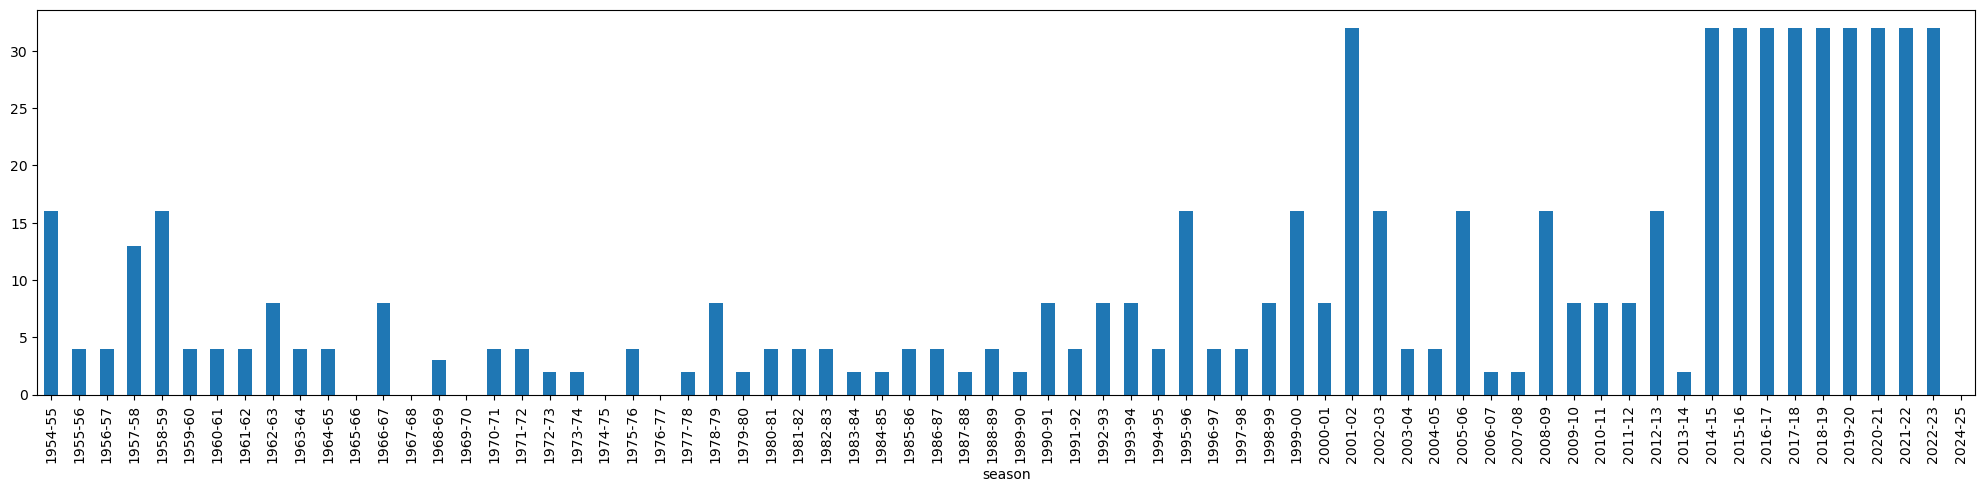

In [1107]:
east.groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

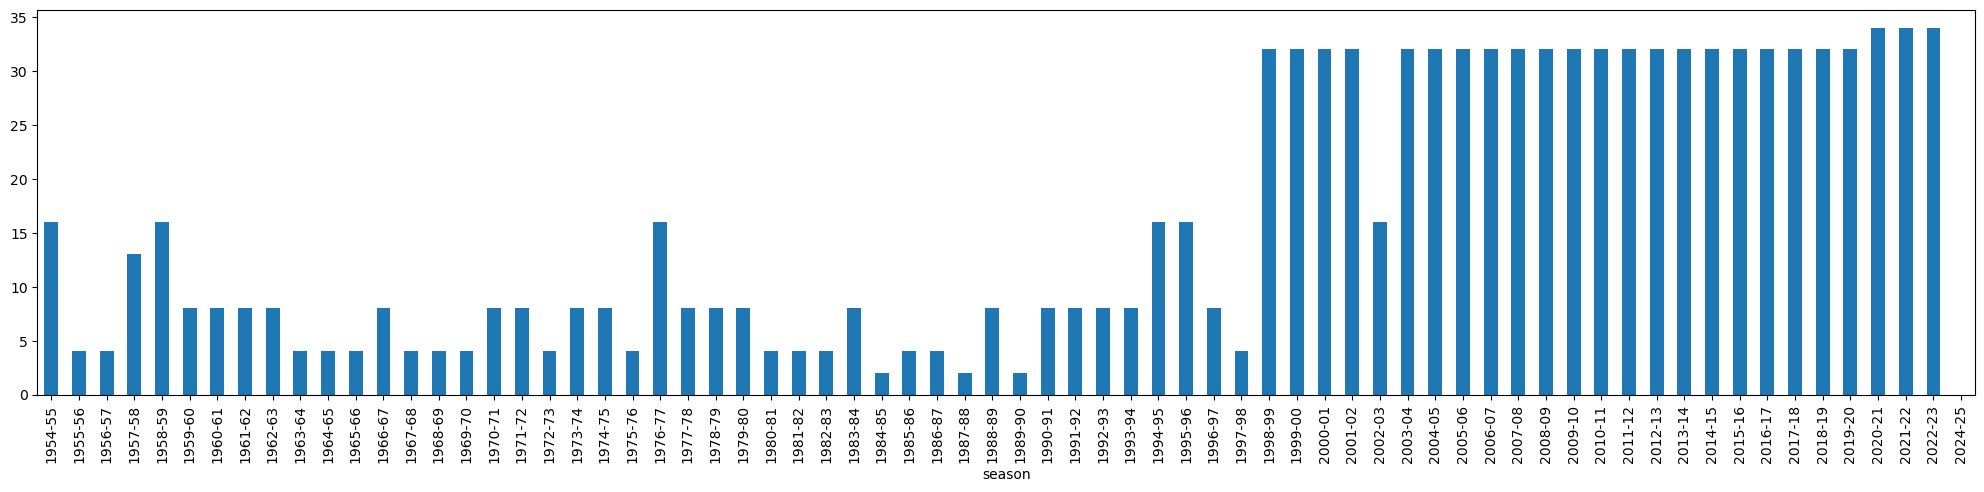

In [1108]:
east[east['competition'] == 'UCL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [1109]:
east[east['homeTeamCountry'] == 'Republic of Ireland']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count


In [1110]:
east[east['competition'] == 'UCL'].groupby('homeTeamCountry')['remaining_teams_count'].min().nsmallest(50)

homeTeamCountry
Socialist Federal Republic of Yugoslavia     2.0
Romania                                      2.0
Ukraine                                      4.0
Poland                                       4.0
Bulgaria                                     4.0
Soviet Union                                 4.0
Czechoslovakia                               4.0
Hungary                                      4.0
Russia                                       8.0
Commonwealth of Independent States           8.0
Croatia                                      8.0
East Germany                                 8.0
Germany                                      8.0
Albania                                     16.0
Czech Republic                              16.0
Slovakia                                    24.0
Kazakhstan                                  32.0
Slovenia                                    32.0
Serbia                                      32.0
Belarus                                     32.0
Azer

<Axes: xlabel='season'>

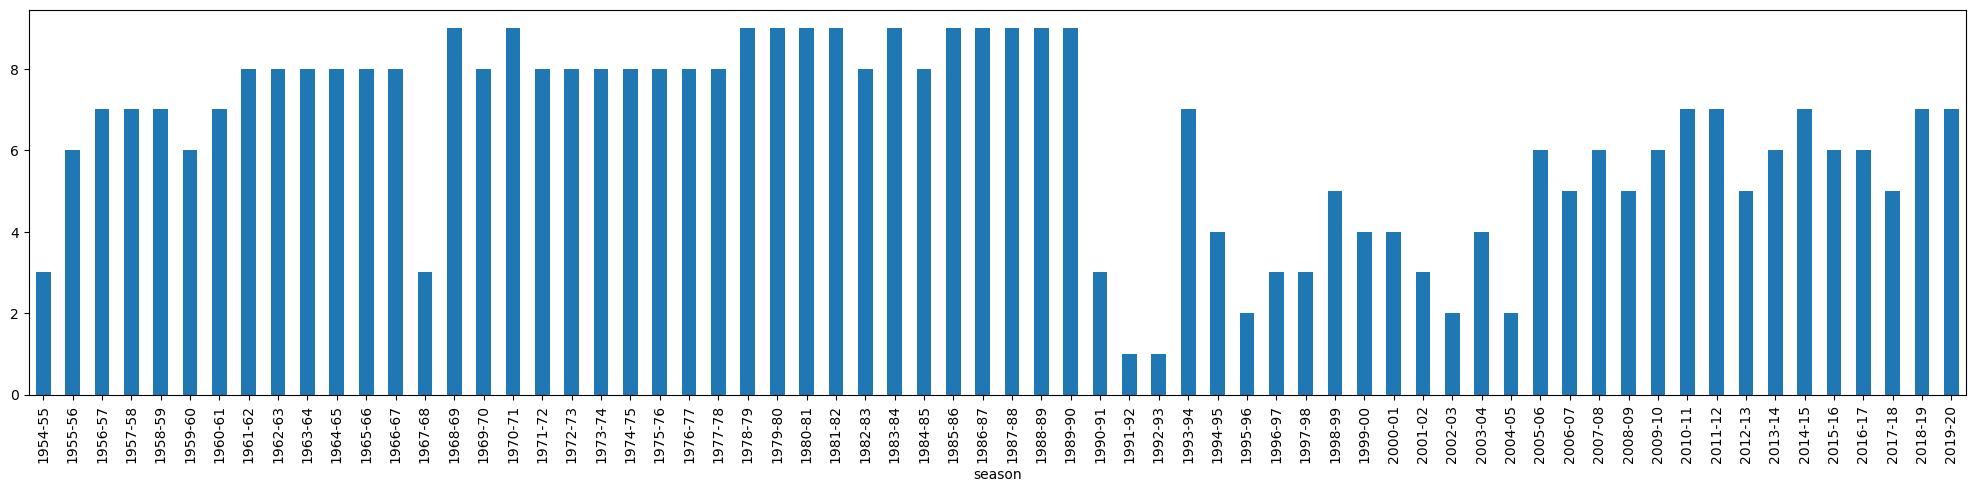

In [1111]:
east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

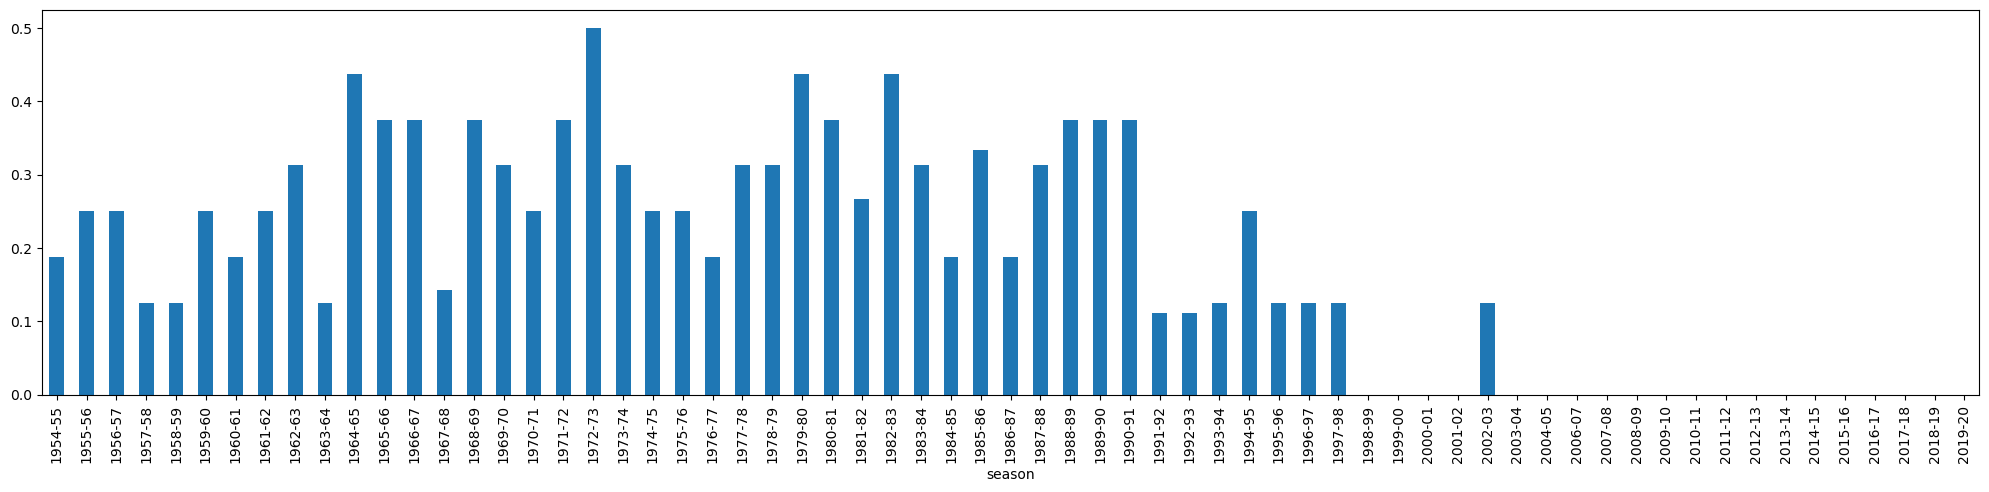

In [1112]:
pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'UCL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

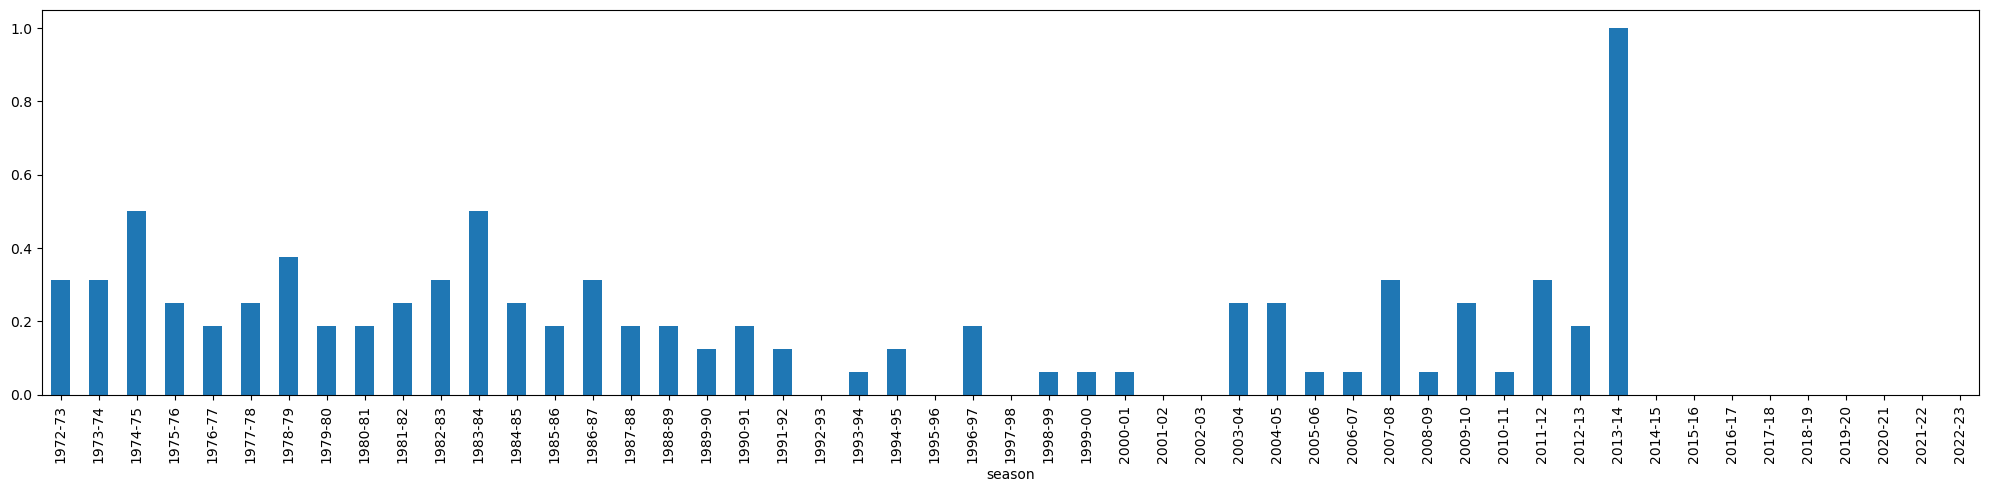

In [1113]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

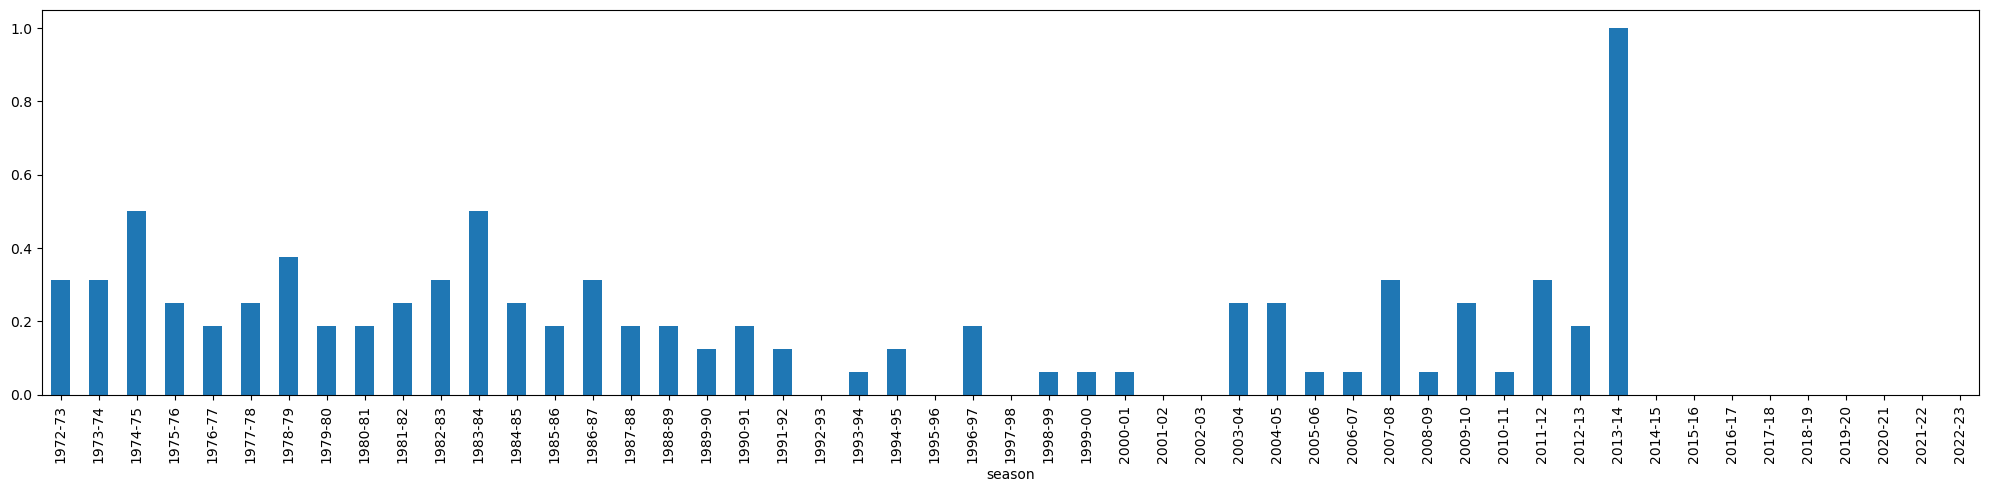

In [1114]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [1115]:
east[(east['competition'] == 'UCL') & (east['season'] == '1991-92')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
CSKA Moscow           8.0
CSKA Sofia            NaN
Dinamo București      NaN
Ferencváros           NaN
Lech Poznań           NaN
Norma Tallinn         NaN
Olimpija Ljubljana    NaN
Skonto                NaN
Slovan Bratislava     NaN
Tavriya Simferopol    NaN
Name: remaining_teams_count, dtype: float64

In [1116]:
half = len(df[df['competition'] == 'UCL'].groupby('season').size()) / 2

In [1117]:
df[df['competition'] == 'UCL'].groupby('season').size().head(35)

season
1954-55    29
1955-56    44
1956-57    48
1957-58    55
1958-59    52
1959-60    51
1960-61    55
1961-62    59
1962-63    61
1963-64    63
1964-65    59
1965-66    65
1966-67    60
1967-68    52
1968-69    63
1969-70    63
1970-71    64
1971-72    57
1972-73    60
1973-74    55
1974-75    61
1975-76    61
1976-77    59
1977-78    63
1978-79    63
1979-80    63
1980-81    63
1981-82    61
1982-83    59
1983-84    61
1984-85    59
1985-86    57
1986-87    61
1987-88    60
1988-89    61
dtype: int64

In [1118]:
east[(east['competition'] == 'UCL') & (east['season'] == '1992-93')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
Spartak Moscow    8.0
Croatia Zagreb    NaN
Dinamo Minsk      NaN
Dinamo Tbilisi    NaN
Dynamo Kyiv       NaN
Ekranas           NaN
Kispest Honvéd    NaN
Lech Poznań       NaN
Levski Sofia      NaN
Norma Tallinn     NaN
Name: remaining_teams_count, dtype: float64

In [1119]:
east[(east['competition'] == 'UCL') & (east['season'] > '1989-90') & (east['remaining_teams_count'] <= 32)].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               58
Shakhtar Donetsk          45
Spartak Moscow            39
CSKA Moscow               36
Sparta Prague             29
Zenit Saint Petersburg    24
Steaua București          22
Lokomotiv Moscow          19
BATE Borisov              15
Dinamo Zagreb             15
CFR Cluj                   9
Maribor                    9
RB Leipzig                 9
Red Star Belgrade          9
Viktoria Plzeň             9
Legia Warsaw               7
dtype: int64

In [1120]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby('homeTeam').size() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby('homeTeam').size()).sort_values().dropna()

homeTeam
Dinamo Zagreb            0.030769
CSKA Moscow              0.040000
Vardar                   0.090909
Levski Sofia             0.105263
Dinamo Tbilisi           0.105263
Slovan Bratislava        0.181818
Spartak Moscow           0.196078
Wisła Kraków             0.230769
Dynamo Kyiv              0.250000
Sparta Prague            0.266667
Legia Warsaw             0.275862
Ferencváros              0.321429
Steaua București         0.428571
Partizan                 0.432432
Lech Poznań              0.444444
Vllaznia                 0.500000
ŁKS Łódź                 0.500000
Željezničar              0.500000
Śląsk Wrocław            0.500000
Sarajevo                 0.600000
Dinamo Minsk             0.600000
Widzew Łódź              0.625000
Dinamo Tirana            0.750000
Hajduk Split             0.818182
Red Star Belgrade        0.975000
Rapid București          1.000000
Partizani                1.400000
MTK Budapest             2.000000
CSKA Sofia               3.333333
Dinam

<Axes: xlabel='season', ylabel='remaining_teams_count'>

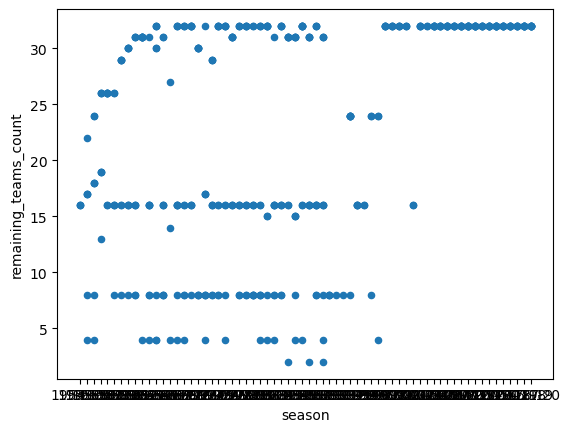

In [1121]:
pd.DataFrame(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby(['season','homeTeam'])['remaining_teams_count'].min()).reset_index().plot.scatter(x='season',y='remaining_teams_count')

<Axes: xlabel='season'>

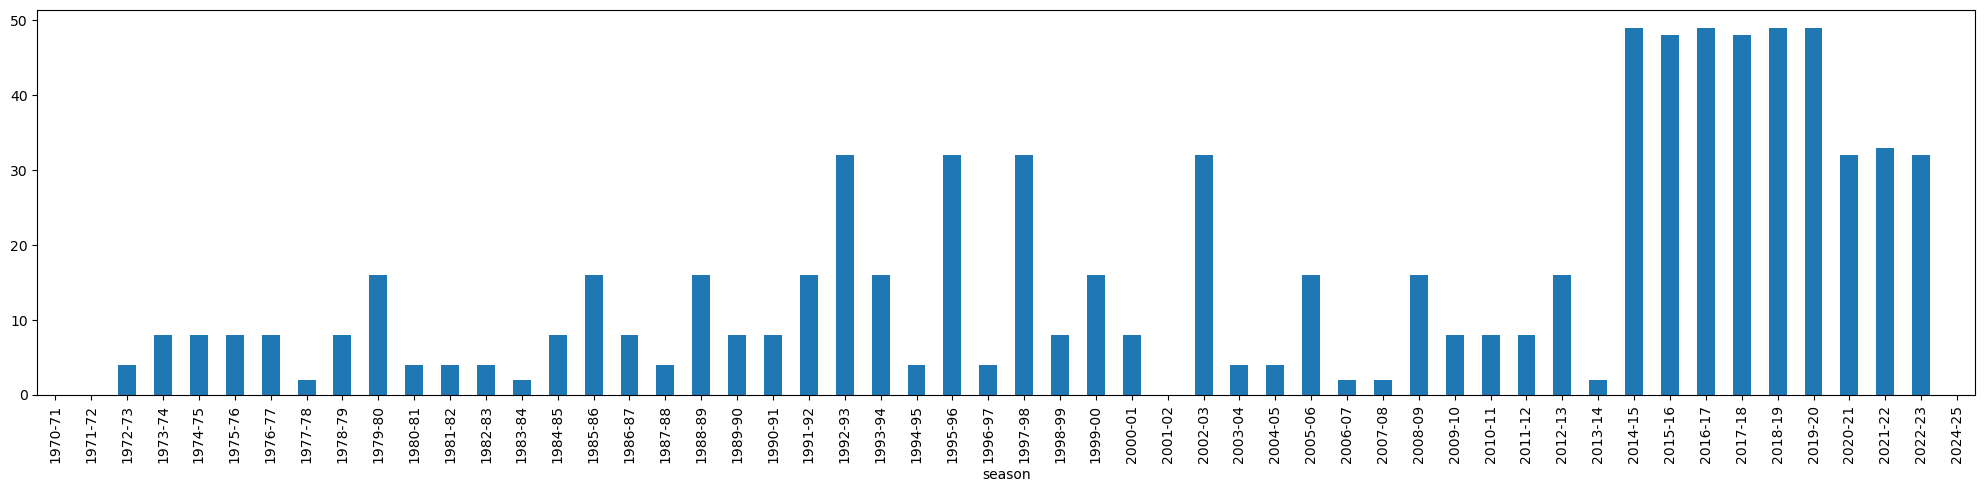

In [1122]:
east[east['competition'] == 'EL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

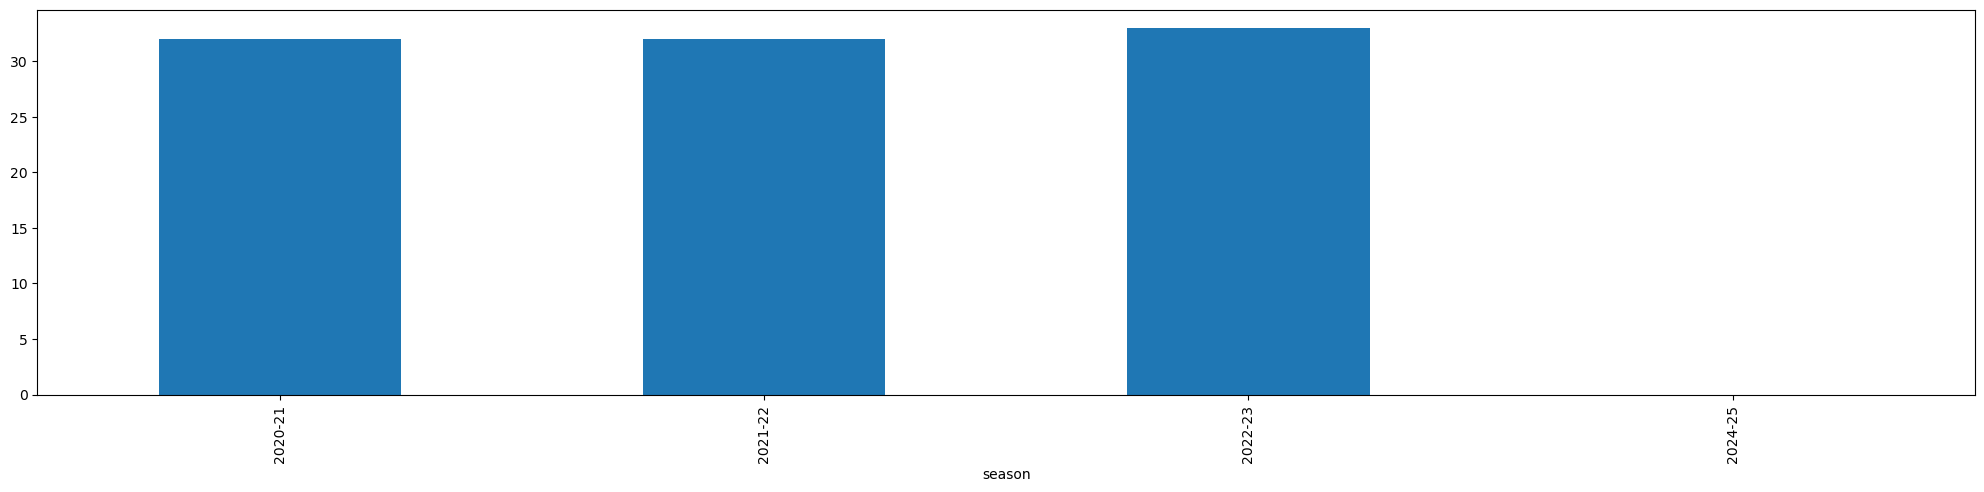

In [1123]:
east[east['competition'] == 'UECL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [1124]:
east[(east['competition'] == 'UCL')].groupby(['season','homeTeamCountry'])['remaining_teams_count'].min()

season   homeTeamCountry                         
1954-55  Hungary                                     16.0
         Poland                                      16.0
         Socialist Federal Republic of Yugoslavia    16.0
1955-56  Bulgaria                                     8.0
         Czechoslovakia                              17.0
                                                     ... 
2024-25  Romania                                      NaN
         Serbia                                       NaN
         Slovakia                                     NaN
         Slovenia                                     NaN
         Ukraine                                      NaN
Name: remaining_teams_count, Length: 979, dtype: float64

## Club names

In [1125]:
east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])

C:\Users\micha\AppData\Local\Temp\ipykernel_28836\3891702428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
C:\Users\micha\AppData\Local\Temp\ipykernel_28836\3891702428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])


In [1126]:
nazvy = east.groupby('nazev')['dedina'].nunique().nlargest(1000)
nazvy = nazvy[nazvy >= 3]
nazvy

nazev
Spartak      10
Dinamo        7
CSKA          6
Dynamo        6
FK            6
FC            5
NK            3
Slavia        3
Khazar        3
TJ            3
KS            3
Artmedia      3
Arsenal       3
Lokomotiv     3
MTK           3
Inter         3
Vasas         3
Budućnost     3
Zagłębie      3
Bohemians     3
Olimpija      3
Daugava       3
Zenit         3
Metalurh      3
Levadia       3
Name: dedina, dtype: int64

In [1127]:
df[df['homeTeam'].str.lower().str.contains('K\wln',na=False)]['homeTeam'].drop_duplicates()

Series([], Name: homeTeam, dtype: object)

In [1128]:
df[df['homeTeam'].str.lower().str.contains('star',na=False)]['homeTeam'].drop_duplicates()

627          Red Star Belgrade
729     PFC Beroe Stara Zagora
1123        Beroe Stara Zagora
1250              Velež Mostar
2916                     Start
8903           Zrinjski Mostar
Name: homeTeam, dtype: object

In [1129]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates().to_list()

['CSKA Cherveno Zname',
 'CSKA September Flag',
 'CSKA Sofia',
 'CSKA Moscow',
 'CSKA Kyiv',
 'CSKA Septemvriysko Zname',
 'CSKA Red Flag',
 'CSKA 1948']

In [1130]:
east[east['homeTeam'].str.lower().str.contains('metal',na=False)]['homeTeam'].drop_duplicates()

1682           Metalist Kharkiv
2433         Liepājas Metalurgs
7313        Metalurh Zaporizhya
7400           Metalurh Donetsk
7436      Metalurh Zaporizhzhya
8383     FHK Liepājas Metalurgs
9096          Liepājas Metalurg
10308           Metalurg Skopje
Name: homeTeam, dtype: object

In [1131]:
east[east['homeTeam'].str.lower().str.contains('slavia',na=False)]['homeTeam'].drop_duplicates()

132      Slavia Sofia
822     Slavia Prague
6759     Slavia Mozyr
Name: homeTeam, dtype: object

In [1132]:
east[east['homeTeam'].str.lower().str.contains('cska',na=False)]['homeTeam'].drop_duplicates()

243           CSKA Cherveno Zname
536           CSKA September Flag
799                    CSKA Sofia
1850                  CSKA Moscow
2427                    CSKA Kyiv
4191     CSKA Septemvriysko Zname
16165               CSKA Red Flag
25017                   CSKA 1948
Name: homeTeam, dtype: object

In [1133]:
east[east['homeTeam'].str.lower().str.contains('arsenal',na=False)]['homeTeam'].drop_duplicates()

11386     Arsenal Kyiv
14662     Arsenal Tula
24982    Arsenal Tivat
Name: homeTeam, dtype: object

In [1134]:
east[east['nazev'].str.contains('Slav',na=False)]['homeTeam'].drop_duplicates()

132      Slavia Sofia
822     Slavia Prague
6759     Slavia Mozyr
8897    Slaven Belupo
9907          Slavija
Name: homeTeam, dtype: object

In [1135]:
east[east['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

539      Olimpija Ljubljana
2111          Olimpija Rīga
9249             Olimps/RFS
9289           Olimpik Baku
10277               Olimpia
10278              Olimpija
12642               Olimpic
13262          Oleksandriya
13736       Olimpik Donetsk
Name: homeTeam, dtype: object

In [1136]:
east[east['nazev'].str.contains('Loko',na=False)]['homeTeam'].drop_duplicates()

979           Lokomotiv Sofia
1003        Lokomotiva Košice
1004       Lokomotive Leipzig
1033        Lokomotíva Košice
2249         Lokomotiv Moscow
2484     Lokomotiv-96 Vitebsk
2571        Lokomotiv Plovdiv
11840              Lokomotiva
Name: homeTeam, dtype: object

In [1137]:
east[east['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1682          Metalist Kharkiv
7313       Metalurh Zaporizhya
7400          Metalurh Donetsk
7436     Metalurh Zaporizhzhya
10308          Metalurg Skopje
Name: homeTeam, dtype: object

In [1138]:
df['nazev'] = df['homeTeam'].apply(lambda x: x.split(' ')[0])
df['dedina'] = df['homeTeam'].apply(lambda x: x.split(' ')[-1])

In [1139]:
df[df['homeTeam'].str.contains('Union',na=False)].groupby('homeTeam').size()

homeTeam
Racing Union             1
Union Berlin            14
Union Luxembourg        19
Union Saint-Gilloise    12
dtype: int64

In [1140]:
df.groupby('nazev')['dedina'].nunique().nlargest(60)

nazev
FC             19
Spartak        10
Inter           9
Dinamo          8
FK              8
Hapoel          8
CSKA            6
Dynamo          6
IFK             6
Racing          5
Real            5
St              5
Aris            4
Arsenal         4
Austria         4
B               4
Maccabi         4
1.              3
Admira          3
Apollon         3
Artmedia        3
BK              3
Bnei            3
Bohemians       3
Boldklubben     3
Budućnost       3
Cork            3
Daugava         3
Fortuna         3
KR              3
KS              3
Khazar          3
La              3
Lausanne        3
Levadia         3
Lokomotiv       3
MTK             3
Metalurh        3
NK              3
Olimpija        3
PSV             3
Rapid           3
Red             3
Slavia          3
Sporting        3
St.             3
Stade           3
TJ              3
Torpedo         3
Union           3
Vasas           3
Vitória         3
Víkingur        3
Zagłębie        3
Zenit           3
ÍA  

In [1141]:
df[df['nazev'].str.contains('Sparta',na=False)]['homeTeam'].drop_duplicates()

43                Spartak Varna
98             Sparta Rotterdam
180               Sparta Prague
319              Spartak Moscow
383              Spartak Trnava
487              Levski-Spartak
3047       Levski-Spartak Sofia
5332        Spartak Vladikavkaz
7321            Spartak Yerevan
10386     Spartak Zlatibor Voda
12696          Spartaks Jūrmala
13171            Spartak Myjava
14079          Spartak Subotica
16063    Spartak Hradec Králové
16226           Spartak Plovdiv
Name: homeTeam, dtype: object

In [1142]:
df[df['nazev'].str.contains('Prague',na=False)]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [1143]:
df[df['nazev'].str.contains('Hapoel',na=False)]['homeTeam'].drop_duplicates()

1934            Hapoel Petah Tikva
2294    Hapoel Ironi Rishon LeZion
2342            Hapoel Be'er Sheva
5698               Hapoel Tel Aviv
6545                  Hapoel Haifa
7576              Hapoel Ramat Gan
8164           Hapoel Bnei Sakhnin
9481    Hapoel Ironi Kiryat Shmona
Name: homeTeam, dtype: object

In [1144]:
df[df['nazev'].str.contains('Real',na=False)]['homeTeam'].drop_duplicates()

198       Real Zaragoza
561         Real Madrid
988          Real Betis
1604      Real Sociedad
1721    Real Valladolid
Name: homeTeam, dtype: object

In [1145]:
df[df['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1682          Metalist Kharkiv
7313       Metalurh Zaporizhya
7400          Metalurh Donetsk
7436     Metalurh Zaporizhzhya
10308          Metalurg Skopje
10781      Metalurgist Rustavi
11285        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [1146]:
df[df['nazev'].str.contains('Ol',na=False)]['homeTeam'].drop_duplicates()

27               Olympiacos
539      Olimpija Ljubljana
990      Olympiakos Nicosia
2111          Olimpija Rīga
9249             Olimps/RFS
9289           Olimpik Baku
9803         Olimpi Rustavi
10277               Olimpia
10278              Olimpija
10861      Olympiakos Volou
10931      Olympiacos Volos
12642               Olimpic
13262          Oleksandriya
13736       Olimpik Donetsk
Name: homeTeam, dtype: object

In [1147]:
df.groupby('nazev')['homeTeam'].nunique().nlargest(10)

nazev
FC         19
Spartak    10
Inter       9
CSKA        8
Dinamo      8
FK          8
Hapoel      8
Dynamo      6
IFK         6
Racing      5
Name: homeTeam, dtype: int64

In [1148]:
df.groupby('nazev')['homeTeamCountry'].nunique().nlargest(20)

nazev
FC           12
Dynamo        9
Inter         8
Dinamo        7
Spartak       7
FK            6
Red           6
Arsenal       4
CSKA          4
Partizan      4
Slavia        4
Torpedo       4
1.            3
Aris          3
Borac         3
Budućnost     3
Hajduk        3
La            3
OFK           3
Olimpija      3
Name: homeTeamCountry, dtype: int64

In [1149]:
df[df['nazev'].str.contains('Red',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Austria                                     1
Federal Republic of Yugoslavia              1
Luxembourg                                  1
Serbia                                      1
Serbia and Montenegro                       1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [1150]:
df[df['nazev'].str.contains('Sparta',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(20)

homeTeamCountry
Bulgaria          4
Czechoslovakia    3
Russia            2
Serbia            2
Slovakia          2
Armenia           1
Czech Republic    1
Latvia            1
Netherlands       1
Soviet Union      1
Name: homeTeam, dtype: int64

In [1151]:
df[df['nazev'].str.contains('Ol',na=False)].groupby('homeTeamCountry')['homeTeam'].nunique().nlargest(10)

homeTeamCountry
Greece                                      3
Latvia                                      2
Slovenia                                    2
Ukraine                                     2
Azerbaijan                                  1
Bosnia and Herzegovina                      1
Cyprus                                      1
Georgia                                     1
Moldova                                     1
Socialist Federal Republic of Yugoslavia    1
Name: homeTeam, dtype: int64

In [1152]:
df[df['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

10          Dinamo Zagreb
31          Dynamo Žilina
237           Dynamo Kyiv
428      Dinamo București
603         Dinamo Tirana
631         Dynamo Moscow
932        Dinamo Tbilisi
1288       Dynamo Dresden
1599         Dinamo Minsk
2151        Dinamo Batumi
2181      Dinamo-93 Minsk
6038     Dinamo Bucharest
6240          Dynamo Baku
8912         Dinamo Brest
14143        Dynamo Brest
Name: homeTeam, dtype: object

In [1153]:
df[df['nazev'].str.lower().str.contains('dinam',na=False)]['homeTeam'].drop_duplicates()

10         Dinamo Zagreb
428     Dinamo București
603        Dinamo Tirana
932       Dinamo Tbilisi
1599        Dinamo Minsk
2151       Dinamo Batumi
2181     Dinamo-93 Minsk
6038    Dinamo Bucharest
8912        Dinamo Brest
Name: homeTeam, dtype: object

In [1154]:
df[df['nazev'].str.lower().str.contains('dynam',na=False)]['homeTeam'].drop_duplicates()

31        Dynamo Žilina
237         Dynamo Kyiv
631       Dynamo Moscow
1288     Dynamo Dresden
6240        Dynamo Baku
14143      Dynamo Brest
Name: homeTeam, dtype: object

In [1155]:
east[east['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

10          Dinamo Zagreb
31          Dynamo Žilina
237           Dynamo Kyiv
428      Dinamo București
603         Dinamo Tirana
631         Dynamo Moscow
932        Dinamo Tbilisi
1288       Dynamo Dresden
1599         Dinamo Minsk
2181      Dinamo-93 Minsk
6038     Dinamo Bucharest
6240          Dynamo Baku
8912         Dinamo Brest
14143        Dynamo Brest
Name: homeTeam, dtype: object

## Getting more serious about losers / winners of the transformation

In [1156]:
last_country = pd.DataFrame(east.sort_values(by='date').groupby('homeTeam')['homeTeamCountry'].last().reset_index())
last_country

,homeTeam,homeTeamCountry
0,1. FC Lokomotive Leipzig,East Germany
1,1. FC Magdeburg,East Germany
2,17 Nëntori,Albania
3,17 Nëntori Tirana,Albania
4,ASA Târgu Mureș,Romania
...,...,...
683,Željezničar,Bosnia and Herzegovina
684,Željezničar Sarajevo,Bosnia and Herzegovina
685,Žepče,Bosnia and Herzegovina
686,Žilina,Slovakia


In [1157]:
last_country[last_country['homeTeamCountry'].str.contains('Czechos')]

,homeTeam,homeTeamCountry
49,Banik Ostrava,Czechoslovakia
50,Baník Ostrava,Czechoslovakia
62,Bohemians,Czechoslovakia
64,Bohemians Prague,Czechoslovakia
151,Dukla Prague,Czechoslovakia
153,Dunajská Streda,Czechoslovakia
160,Dynamo Žilina,Czechoslovakia
230,Internacionál Bratislava,Czechoslovakia
231,Internacionál Slovnaft Bratislava,Czechoslovakia
315,Lokomotiva Košice,Czechoslovakia


In [1158]:
last_country.loc[last_country['homeTeamCountry'] == 'Germany', 'homeTeamCountry'] = 'East Germany'
last_country.loc[last_country['homeTeam'] == 'Zenit', 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Dnepropetrovsk',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Kiev',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Rostov',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Leningrad',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Petersburg',na=False), 'homeTeamCountry'] = 'Russia'
last_country.loc[last_country['homeTeam'].str.contains('Voroshilovgrad',na=False), 'homeTeamCountry'] = 'Ukraine'
last_country.loc[last_country['homeTeam'].str.contains('Prague',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Brno',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Ostrava',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Plzeň',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Vítkovice',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Hradec',na=False), 'homeTeamCountry'] = 'Czech Republic'
last_country.loc[last_country['homeTeam'].str.contains('Bratislava',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Košice',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('VSS',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Nitra',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Žilina',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Streda',na=False), 'homeTeamCountry'] = 'Slovakia'
last_country.loc[last_country['homeTeam'].str.contains('Belgrade XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Budućnost Banatski Dvor',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Sartid',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Bečej',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Železnik',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('FK Partizan',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'] == 'Partizan', 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('FK Red Star',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Vardar',na=False), 'homeTeamCountry'] = 'North Macedonia'
last_country.loc[last_country['homeTeam'].str.contains('FK Vojvodina',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('GNK Dinamo Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('HAŠK Građanski',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('NK Rijeka',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Napredak Kruševac',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Novi Sad XI',na=False), 'homeTeamCountry'] = 'Serbia'
last_country.loc[last_country['homeTeam'].str.contains('Obilić',na=False), 'homeTeamCountry'] = 'Kosovo'
last_country.loc[last_country['homeTeam'].str.contains('RŠD Velež',na=False), 'homeTeamCountry'] = 'Bosnia and Herzegovina'
last_country.loc[last_country['homeTeam'].str.contains('Trešnjevka Zagreb',na=False), 'homeTeamCountry'] = 'Croatia'
last_country.loc[last_country['homeTeam'].str.contains('Zagreb XI',na=False), 'homeTeamCountry'] = 'Croatia'

In [1159]:
last_country = last_country[last_country['homeTeamCountry'] != 'Czechoslovakia']

In [1160]:
def get_city(club):
    try:
        return df[df['homeTeam'] == club]['city'].value_counts().nlargest(1).index.to_list()[0]
    except Exception as E:
        print(club)
        print(E)
        return None

In [1161]:
last_country['city'] = last_country['homeTeam'].apply(lambda x: get_city(x))

1. FC Lokomotive Leipzig
list index out of range
Aufbau Magdeburg
list index out of range
BSG Chemie Leipzig
list index out of range
BSG Sachsenring Zwickau
list index out of range
Czarni Żagań
list index out of range
Diósgyőri VTK Miskolc
list index out of range
FC Shakhtar Donetsk
list index out of range
FK Bor
list index out of range
Haladás VSE
list index out of range
Jiul Petroşani
list index out of range
KS Partizani
list index out of range
Lokomotiva Košice
list index out of range
MTK/VM Budapest
list index out of range
Raba Vasas ETO
list index out of range
Stal Rzeszów
list index out of range


C:\Users\micha\AppData\Local\Temp\ipykernel_28836\1158077462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country['city'] = last_country['homeTeam'].apply(lambda x: get_city(x))


In [1162]:
last_country.loc[last_country['city'].str.contains('Leningrad',na=False), 'city'] = 'Saint Petersburg'
last_country.loc[last_country['city'] == 'East Berlin', 'city'] = 'Berlin'

In [1163]:
def count_matches(row):
    before89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] <= '1989-90') & (df['remaining_teams_count'] <= 8)])
    after89 = len(df[(df['homeTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)]) + len(df[(df['awayTeam'] == row['homeTeam']) & (df['season'] > '1989-90') & (df['remaining_teams_count'] <= 8)])
    return pd.Series([before89, after89])

In [1164]:
last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)

C:\Users\micha\AppData\Local\Temp\ipykernel_28836\2927248340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_28836\2927248340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_country[['before_89','after_89']] = last_country.apply(lambda row: count_matches(row), axis=1)


In [1165]:
last_country.sample(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
256,Kareda Šiauliai,Lithuania,Šiauliai,0,0
182,FK Vardar,North Macedonia,Skopje,0,0
634,Váci Izzó MTE,Hungary,Vác,0,0
120,Dacia,Moldova,Chişinău,0,0
55,Beroe,Bulgaria,Stara Zagora,0,0
546,Sutjeska Nikšić,Montenegro,Nikšić,0,0
232,Irtysh,Kazakhstan,Karagandy,0,0
471,Sachsenring Zwickau,East Germany,Zwickau,4,0
46,Ballkani,Kosovo,Pristina,0,0
362,NK Zagreb,Croatia,Zagreb,0,0


In [1166]:
last_country[last_country['homeTeam'].str.contains('Sov')]

,homeTeam,homeTeamCountry,city,before_89,after_89
280,Krylia Sovetov,Russia,Samara,0,0
281,Krylya Sovetov Samara,Russia,Samara,0,0


In [1167]:
last_country[last_country['homeTeam'].str.contains('Sla')]

,homeTeam,homeTeamCountry,city,before_89,after_89
361,NK Slaven Belupo,Croatia,Koprivnica,0,0
505,Slaven Belupo,Croatia,Koprivnica,0,0
506,Slavia Mozyr,Belarus,Mozyr,0,0
507,Slavia Prague,Czech Republic,Prague,0,8
508,Slavia Sofia,Bulgaria,Sofia,6,0
509,Slavija,Bosnia and Herzegovina,Sarajevo,0,0


In [1168]:
last_country[last_country['homeTeam'].str.contains('Slova')]

,homeTeam,homeTeamCountry,city,before_89,after_89
513,Slovan Bratislava,Slovakia,Bratislava,5,0
514,Slovan Liberec,Czech Republic,Liberec,0,2
515,Slovan UNV Bratislava,Slovakia,Bratislava,0,0


In [1169]:
last_country[last_country['homeTeam'].str.contains('Partizan')]

,homeTeam,homeTeamCountry,city,before_89,after_89
246,KS Partizani,Albania,None,0,0
407,Partizan,Serbia,Belgrade,9,0
408,Partizani,Albania,Tirana,2,0
409,Partizani Tirana,Albania,Tirana,0,0


In [1170]:
last_country[last_country['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
157,Dynamo Dresden,East Germany,Dresden,16,0
151,Dukla Prague,Czech Republic,Prague,16,0
294,Legia Warsaw,Poland,Warsaw,14,0
316,Lokomotive Leipzig,East Germany,Leipzig,11,0
131,Dinamo București,Romania,Bucharest,10,0
209,Górnik Zabrze,Poland,Zabrze,10,0
98,Carl Zeiss Jena,East Germany,Jena,9,0
407,Partizan,Serbia,Belgrade,9,0
329,Magdeburg,East Germany,Magdeburg,9,0
133,Dinamo Tbilisi,Soviet Union,Tbilisi,9,0


In [1171]:
last_country[last_country['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,homeTeam,homeTeamCountry,city,before_89,after_89
90,CSKA Moscow,Russia,Moscow,0,11
310,Lokomotiv Moscow,Russia,Moscow,0,8
507,Slavia Prague,Czech Republic,Prague,0,8
656,Zenit Saint Petersburg,Russia,Saint Petersburg,0,7
514,Slovan Liberec,Czech Republic,Liberec,0,2
608,Varteks,Croatia,Varaždin,0,2
300,Levski Sofia,Bulgaria,Sofia,0,2
339,Metalist Kharkiv,Ukraine,Kharkiv,0,2
496,Sigma Olomouc,Czech Republic,Olomouc,0,2
457,Rubin Kazan,Russia,Kazan,0,2


In [1172]:
last_country[last_country['homeTeam'].str.contains('Zenit',na=False)]

,homeTeam,homeTeamCountry,city,before_89,after_89
654,Zenit,Russia,Saint Petersburg,0,0
655,Zenit Leningrad,Russia,Saint Petersburg,0,0
656,Zenit Saint Petersburg,Russia,Saint Petersburg,0,7


In [1173]:
eastern_countries = last_country.groupby('homeTeamCountry')[['before_89','after_89']].sum()

In [1174]:
eastern_countries[eastern_countries['before_89'] == 0].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
homeTeamCountry,,
Russia,0,28
Croatia,0,2
Armenia,0,0
Azerbaijan,0,0
Estonia,0,0


In [1175]:
eastern_countries[eastern_countries['after_89'] == 0].sort_values(by='before_89',ascending=False).head(10)

,before_89,after_89
homeTeamCountry,,
East Germany,66,0
Hungary,45,0
Poland,38,0
Serbia,15,0
Bosnia and Herzegovina,6,0
Slovakia,5,0
Belarus,5,0
Albania,2,0
Moldova,0,0


In [1176]:
eastern_countries.sort_values(by='after_89',ascending=False).head(100)

,before_89,after_89
homeTeamCountry,,
Russia,0,28
Ukraine,36,26
Czech Republic,42,20
Soviet Union,41,18
Socialist Federal Republic of Yugoslavia,63,8
Romania,36,8
Bulgaria,39,2
Croatia,0,2
Moldova,0,0


In [1177]:
east[east['homeTeam'].str.contains('Tbili',na=False)].sort_values(by='remaining_teams_count').head(5)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
1175,CWC,1981-05-13,2-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Carl Zeiss Jena,East Germany,FC_Carl_Zeiss_Jena,"Rheinstadion, Düsseldorf",final,4750.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1979-80,Düsseldorf,2.0,Dinamo,Tbilisi
1278,CWC,1982-04-07,0-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Standard Liège,Belgium,Standard_Li%C3%A8ge,"Lenin Dinamo Stadium, Tbilisi",semi-finals,88400.0,NaN,1981%E2%80%9382 European Cup Winners%27 Cup,1980-81,Tbilisi,4.0,Dinamo,Tbilisi
1216,CWC,1981-04-08,3-0,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Feyenoord,Netherlands,Feyenoord,"Lenin Dinamo Stadium, Tbilisi",semi-finals,80000.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1979-80,Tbilisi,4.0,Dinamo,Tbilisi
1196,CWC,1981-03-18,0-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,West Ham United,England,West_Ham_United_F.C.,"Lenin Dinamo Stadium, Tbilisi",quarter-finals,90000.0,NaN,1980%E2%80%9381 European Cup Winners%27 Cup,1979-80,Tbilisi,8.0,Dinamo,Tbilisi
1259,CWC,1982-03-17,1-0,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,Legia Warsaw,Poland,Legia_Warsaw,"Lenin Dinamo Stadium, Tbilisi",quarter-finals,80000.0,NaN,1981%E2%80%9382 European Cup Winners%27 Cup,1980-81,Tbilisi,8.0,Dinamo,Tbilisi


In [1178]:
eastern_cities = last_country.groupby('city')[['before_89','after_89']].sum()

In [1179]:
eastern_cities[eastern_cities['after_89'] <= 2].sort_values(by='before_89',ascending=False).head(5)

,before_89,after_89
city,,
Sofia,37,2
Budapest,31,0
Dresden,16,0
Split,16,2
Warsaw,14,0


In [1180]:
eastern_cities[eastern_cities['after_89'] == 0].sort_values(by='before_89',ascending=False).head(20)

,before_89,after_89
city,,
Budapest,31,0
Dresden,16,0
Warsaw,14,0
Jena,12,0
Berlin,12,0
Magdeburg,11,0
Leipzig,11,0
Ostrava,10,0
Zabrze,10,0


In [1181]:
eastern_cities[eastern_cities['before_89'] == 0].sort_values(by='after_89',ascending=False).head(10)

,before_89,after_89
city,,
Saint Petersburg,0,7
Kazan,0,2
Liberec,0,2
Kharkiv,0,2
Olomouc,0,2
Varaždin,0,2
Senica,0,0
Samara,0,0
Prilep,0,0


In [1182]:
eastern_cities[eastern_cities['before_89'] <= 2].sort_values(by='after_89',ascending=False).head(5)

,before_89,after_89
city,,
Saint Petersburg,0,7
Donetsk,2,5
Liberec,0,2
Kazan,0,2
Olomouc,0,2


## Attendance

In [1183]:
df['attendance'] = pd.to_numeric(df['attendance'])

In [1184]:
df[df['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Madrid        18997146.0
Barcelona     12479150.0
Milan         12209518.0
Manchester    11860931.0
London        11234933.0
Glasgow       10258005.0
Munich        10211916.0
Lisbon         8324919.0
Kyiv           5593720.0
Istanbul       5543922.0
Amsterdam      5482016.0
Athens         5457659.0
Turin          4970880.0
Porto          4902801.0
Liverpool      4863735.0
Dortmund       4704540.0
Belgrade       4196802.0
Moscow         3915908.0
Rome           3643959.0
Paris          3588586.0
Name: attendance, dtype: float64

In [1185]:
east[east['competition'] == 'UCL'].groupby("city")['attendance'].sum().nlargest(20)

city
Kyiv                5517159.0
Belgrade            4107318.0
Moscow              3848598.0
Bucharest           2612127.0
Sofia               2560903.0
Budapest            2120763.0
Prague              1973449.0
Donetsk             1492777.0
Zagreb              1240808.0
Baku                1017376.0
Chorzów              787803.0
Saint Petersburg     767990.0
Leipzig              739690.0
Warsaw               705165.0
Bratislava           643659.0
Tbilisi              516381.0
Berlin               478006.0
Astana               449937.0
Kharkiv              422205.0
Split                420664.0
Name: attendance, dtype: float64

In [1186]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb         0.037631
Leipzig        0.051857
Skopje         0.086967
Moscow         0.182917
Kharkiv        0.235641
Minsk          0.315978
Kyiv           0.368922
Elbasan        0.415743
Warsaw         0.431970
Sarajevo       0.444085
Prague         0.527524
Bratislava     0.561351
Poznań         0.623796
Yerevan        0.655489
Kraków         0.712017
Wrocław        0.787550
Bucharest      0.979301
Berlin         0.979919
Split          1.089892
Belgrade       1.101615
Tbilisi        1.311660
Łódź           1.628117
Budapest       2.328870
Győr           2.436264
Sofia          2.531457
Simferopol     2.823367
Tirana         3.690394
Trnava         5.538171
Ostrava       26.268532
Craiova       27.271000
Name: attendance, dtype: float64

In [1187]:
east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum()

city
Arad           49781.0
Aue           142000.0
Barcelona      97000.0
Bari           51587.0
Belgrade     2152955.0
               ...    
Wrocław        25000.0
Yerevan       124748.0
Zabrze        107876.0
Zagreb         45000.0
Łódź          135500.0
Name: attendance, Length: 66, dtype: float64

In [1188]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby("city")['attendance'].sum() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby("city")['attendance'].sum()).dropna().sort_values()

city
Zagreb         0.037631
Leipzig        0.051857
Skopje         0.086967
Moscow         0.182917
Kharkiv        0.235641
Minsk          0.315978
Kyiv           0.368922
Elbasan        0.415743
Warsaw         0.431970
Sarajevo       0.444085
Prague         0.527524
Bratislava     0.561351
Poznań         0.623796
Yerevan        0.655489
Kraków         0.712017
Wrocław        0.787550
Bucharest      0.979301
Berlin         0.979919
Split          1.089892
Belgrade       1.101615
Tbilisi        1.311660
Łódź           1.628117
Budapest       2.328870
Győr           2.436264
Sofia          2.531457
Simferopol     2.823367
Tirana         3.690394
Trnava         5.538171
Ostrava       26.268532
Craiova       27.271000
Name: attendance, dtype: float64

<Axes: xlabel='season'>

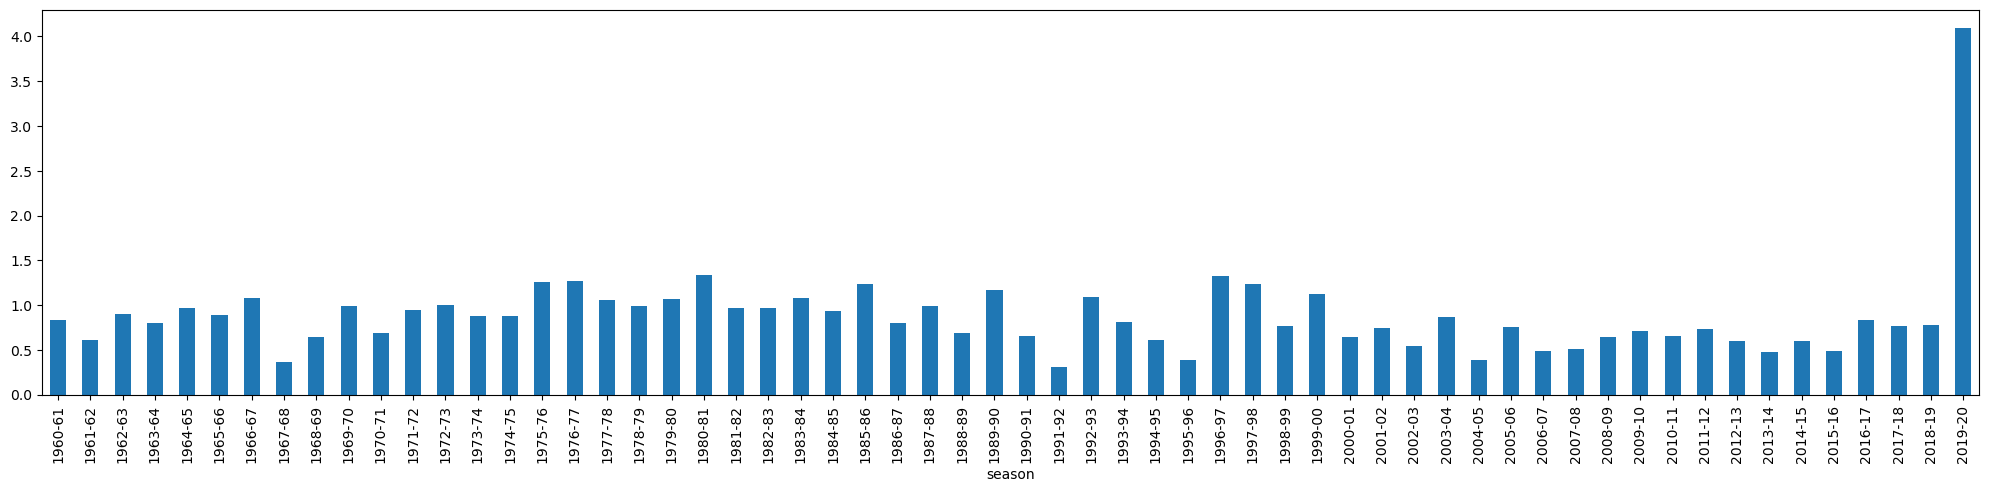

In [1189]:
pd.Series(east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean() / df[(df['remaining_teams_count'] > 2) & (df['remaining_teams_count'] <= 32) & (df['competition'] == 'UCL')].groupby('season')['attendance'].mean()).tail(60).plot.bar(figsize=(25,5))

In [1190]:
east.groupby('city')['attendance'].median().nlargest(60)

city
Barcelona                   97000.0
Seville                     65000.0
Bari                        51587.0
Chorzow                     48617.0
Germany                     46969.0
Manchester                  43878.0
Odessa                      40887.0
Lyon                        39300.0
Lenin Dinamo Stadium        35000.0
Dresden                     33000.0
Kharkiv                     33000.0
Leningrad                   32000.0
Leipzig                     30800.0
Brussels                    30000.0
Volgograd                   26000.0
Kiev                        25811.5
Kyiv                        25610.5
Donetsk                     25500.0
Kryvyi Rih                  25440.0
Bytom                       25000.0
Magdeburg                   25000.0
Gdańsk                      24697.0
Karl-Marx-Stadt             24300.0
Lviv                        23618.0
Mielec                      23385.0
Split                       22512.0
Craiova                     22067.0
Aue                    

In [1191]:
east.groupby('location')['attendance'].max().nlargest(50)

location
Red Star Stadium, Belgrade                   110000.0
Central Stadium, Kyiv                        102000.0
Olympic Stadium, Kyiv                        100069.0
Republican Stadium, Kyiv                     100067.0
Népstadion, Budapest                         100000.0
Camp Nou, Barcelona                           97000.0
Respublikanskiy Stadium, Kyiv                 93700.0
Lenin Dinamo Stadium, Tbilisi                 90000.0
Stadion Crvena Zvezda, Belgrade               90000.0
Vladimir Lenin Stadium, Tbilisi               90000.0
Marakana, Belgrade                            89806.0
Silesian Stadium, Chorzów                     89089.0
Central Lenin Stadium, Moscow                 86500.0
Stadion Crvena zvezda, Belgrade               85227.0
Central Stadium Vladimir Lenin, Moscow        85000.0
Stadionul August 23, Bucharest                85000.0
Olimpiyskiy National Sports Complex, Kyiv     83200.0
Olimpiyskiy NSC, Kyiv                         82750.0
Zentralstadion, Lei

In [1192]:
df[df['season'] >= '2021-22'].groupby('location')['attendance'].median().nlargest(60)

location
Camp Nou, Barcelona                          87120.5
Wembley Stadium, London                      86212.0
Westfalenstadion, Dortmund                   81365.0
Allianz Arena, Munich                        75000.0
San Siro, Milan                              74000.5
Olympiastadion, Berlin                       73420.0
Old Trafford, Manchester                     73204.0
Atatürk Olympic Stadium, Istanbul            71412.0
Santiago Bernabéu, Madrid                    64346.0
Metropolitano Stadium, Madrid                62658.0
Estádio do Sport Lisboa e Benfica, Lisbon    62594.0
Stade Vélodrome, Marseille                   62500.0
Stadio Olimpico, Rome                        60193.0
Emirates Stadium, London                     59929.0
Tottenham Hotspur Stadium, London            58477.5
Olympic Stadium, Athens                      57003.0
Celtic Park, Glasgow                         56724.0
Estádio da Luz, Lisbon                       56277.5
Puskás Aréna, Budapest               

In [1193]:
df[df['season'] > '2013-14'].groupby('awayTeam')['attendance'].median().nlargest(60)

awayTeam
Newcastle United            65695.0
Brighton & Hove Albion      57780.0
Paris Saint-Germain         48357.0
Barcelona                   47735.0
Real Madrid                 46858.0
Oostende                    46519.0
Bayern Munich               44118.0
Manchester City             43991.5
Juventus                    42186.0
Dinamo București            41845.0
Rostov                      40392.0
Porto                       39675.0
Liverpool                   39186.5
Valencia                    39070.0
Atlético Madrid             38830.0
RB Leipzig                  37351.5
Inter Milan                 36591.0
Napoli                      35344.5
Arsenal                     35000.0
Borussia Dortmund           34593.0
Benfica                     34111.0
Lens                        34055.5
Utrecht                     33446.0
Celta Vigo                  33117.0
Toulouse                    32719.0
Sevilla                     31433.0
SC Freiburg                 31137.5
Milan              

In [1194]:
east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean()

season
1954-55    30000.000000
1955-56    38000.000000
1956-57    37750.000000
1957-58    24166.666667
1958-59    43125.000000
               ...     
2015-16    19442.611111
2016-17    36065.388889
2017-18    35190.400000
2018-19    33884.714286
2019-20     7078.333333
Name: attendance, Length: 66, dtype: float64

## A potential plot twist: is there _more_ European-level soccer in the East after all?

In [1195]:
east['competition'].drop_duplicates()

2         CWC
2526       EL
15831     UCL
24098    UECL
Name: competition, dtype: object

<Axes: xlabel='season'>

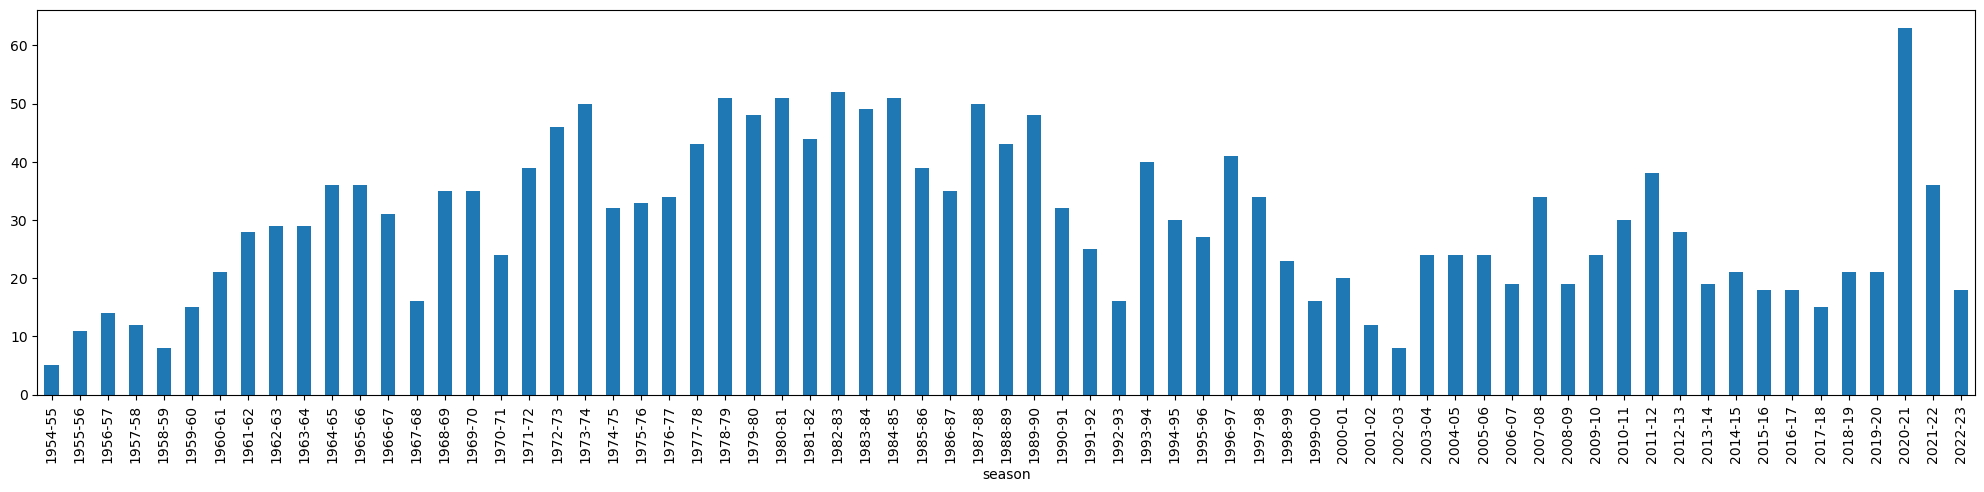

In [1196]:
east[east['remaining_teams_count'] <= 32].groupby('season').size().plot.bar(figsize=(25,5))

In [1197]:
top4 = df[df['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(4).index.to_list()
top4

['Real Madrid', 'Bayern Munich', 'Barcelona', 'Juventus']

In [1198]:
df[df['homeTeam'].str.contains('Pozna',na=False)].groupby('homeTeam').size()

homeTeam
Lech Poznań    64
dtype: int64

In [1199]:
top8 = ['Real Madrid','Milan','Inter Milan','Bayern Munich','Bayern Münich','FC Bayern Munich','Liverpool','Barcelona','FC Barcelona','Ajax','Manchester United']

## Best EE clubs after 1990

In [1200]:
east[(east['competition'] == 'UCL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Dynamo Kyiv           4.0
CSKA Moscow           8.0
Hajduk Split          8.0
Red Star Belgrade     8.0
Sparta Prague         8.0
Spartak Moscow        8.0
Ferencváros          16.0
Legia Warsaw         16.0
Lokomotiv Moscow     16.0
Steaua București     16.0
Widzew Łódź          16.0
Croatia Zagreb       24.0
Košice               24.0
Vác FC Samsung       24.0
Artmedia             32.0
Astana               32.0
BATE Borisov         32.0
CFR Cluj             32.0
Debrecen             32.0
Dinamo Zagreb        32.0
Name: remaining_teams_count, dtype: float64

In [1201]:
east[(east['competition'] == 'EL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Dnipro Dnipropetrovsk      2.0
Shakhtar Donetsk           2.0
Zenit Saint Petersburg     2.0
CSKA Moscow                4.0
Dynamo Kyiv                4.0
Slavia Prague              4.0
Spartak Moscow             4.0
Steaua București           4.0
Levski Sofia               8.0
Metalist Kharkiv           8.0
Rapid București            8.0
Rubin Kazan                8.0
Sigma Olomouc              8.0
Slovan Liberec             8.0
Anzhi Makhachkala         16.0
Croatia Zagreb            16.0
Dynamo Moscow             16.0
GKS Katowice              16.0
Ludogorets Razgrad        16.0
Partizan                  16.0
Name: remaining_teams_count, dtype: float64

In [1202]:
east[(east['competition'] == 'UECL') & (east['season'] >= '1990-91')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(20)

homeTeam
Alashkert            32.0
Ballkani             32.0
CFR Cluj             32.0
CSKA Sofia           32.0
Dnipro-1             32.0
FCSB                 32.0
Flora                32.0
Jablonec             32.0
Kairat               32.0
Lech Poznań          32.0
Mura                 32.0
Partizan             32.0
Pyunik               32.0
Qarabağ              32.0
RFS                  32.0
Slavia Prague        32.0
Slovan Bratislava    32.0
Slovácko             32.0
Union Berlin         32.0
Zorya Luhansk        32.0
Name: remaining_teams_count, dtype: float64

In [1203]:
east[(east['competition'] == 'UCL') & (east['homeTeam'] == 'Sparta Prague') & (east['season'] >= '1990-91')].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
20032,UCL,2004-08-25,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Stadion Letná, Prague",NaN,18010.0,NaN,2004%E2%80%9305 UEFA Champions League qualifyi...,2003-04,Prague,NaN,Sparta,Prague
20048,UCL,2005-09-14,1-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,Ajax,Netherlands,AFC_Ajax,"Letná Stadium, Prague",group b,15386.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2004-05,Prague,32.0,Sparta,Prague
20052,UCL,2005-10-18,0-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Arsenal,England,Arsenal_F.C.,"Letná Stadium, Prague",group b,12528.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2004-05,Prague,32.0,Sparta,Prague
20058,UCL,2005-12-07,0-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Thun,Switzerland,FC_Thun,"Letná Stadium, Prague",group b,9233.0,NaN,2005%E2%80%9306 UEFA Champions League group stage,2004-05,Prague,32.0,Sparta,Prague
20612,UCL,2007-08-15,0-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Arsenal,England,Arsenal_F.C.,"Generali Arena, Prague",NaN,19856.0,NaN,2007%E2%80%9308 UEFA Champions League qualifyi...,2006-07,Prague,NaN,Sparta,Prague
20813,UCL,2008-08-06,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Sheriff Tiraspol,Moldova,FC_Sheriff_Tiraspol,"AXA Arena, Prague",NaN,11479.0,NaN,2008%E2%80%9309 UEFA Champions League qualifyi...,2007-08,Prague,NaN,Sparta,Prague
20826,UCL,2008-08-13,1-2,Sparta Prague,Czech Republic,AC_Sparta_Prague,Panathinaikos,Greece,Panathinaikos_F.C.,"AXA Arena, Prague",NaN,14478.0,NaN,2008%E2%80%9309 UEFA Champions League qualifyi...,2007-08,Prague,NaN,Sparta,Prague
20985,UCL,2009-07-28,3-1,Sparta Prague,Czech Republic,AC_Sparta_Prague,Panathinaikos,Greece,Panathinaikos_F.C.,"AXA Arena, Prague",NaN,12058.0,NaN,2009%E2%80%9310 UEFA Champions League qualifyi...,2008-09,Prague,NaN,Sparta,Prague
21192,UCL,2010-07-21,2-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Liepājas Metalurgs,Latvia,FK_Liep%C4%81jas_Metalurgs,"Generali Arena, Prague",NaN,8025.0,NaN,2010%E2%80%9311 UEFA Champions League qualifyi...,2009-10,Prague,NaN,Sparta,Prague
21198,UCL,2010-07-27,1-0,Sparta Prague,Czech Republic,AC_Sparta_Prague,Lech Poznań,Poland,Lech_Pozna%C5%84,"Generali Arena, Prague",NaN,14588.0,NaN,2010%E2%80%9311 UEFA Champions League qualifyi...,2009-10,Prague,NaN,Sparta,Prague


In [1204]:
east[(east['competition'] == 'UCL') & (east['season'] >= '2013-14')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(30)

homeTeam
Astana                    32.0
BATE Borisov              32.0
CSKA Moscow               32.0
Dinamo Zagreb             32.0
Dynamo Kyiv               32.0
Ferencváros               32.0
Krasnodar                 32.0
Legia Warsaw              32.0
Lokomotiv Moscow          32.0
Ludogorets Razgrad        32.0
Maribor                   32.0
Qarabağ                   32.0
RB Leipzig                32.0
Red Star Belgrade         32.0
Rostov                    32.0
Shakhtar Donetsk          32.0
Slavia Prague             32.0
Spartak Moscow            32.0
Viktoria Plzeň            32.0
Zenit Saint Petersburg    32.0
Sheriff Tiraspol          34.0
Union Berlin              34.0
CFR Cluj                  59.0
Celje                     59.0
Dynamo Brest              59.0
Lokomotiva                59.0
Sūduva                    59.0
Tirana                    59.0
Kukësi                    60.0
Nõmme Kalju               60.0
Name: remaining_teams_count, dtype: float64

## Charts

In [1205]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti = [],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()

    categories = [str(x) for x in categories]

    nastaveni["xAxis"] = {"categories": categories, "min": 0}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0
            
    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y =  {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa
                
            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )
                    
            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [1206]:
ligamistru = pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="PMEZ / Liga mistrů")
uefa = pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár UEFA / EL")
pvp = pd.Series(east[(east['competition'] == 'CWC') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár vítězů pohárů")
uecl = pd.Series(east[(east['competition'] == 'UECL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Konfederační liga")

In [1207]:
podpis = ['Vizualizace: Samizdat, datový tým Českého rozhlasu','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika']

In [1208]:
east[east['homeTeam'].str.contains('namo',na=False)].groupby('homeTeam').size().nlargest(50)

homeTeam
Dynamo Kyiv         210
Dinamo Zagreb       150
Dinamo București     88
Dinamo Tbilisi       85
Dinamo Minsk         67
Dynamo Moscow        53
Dynamo Dresden       46
BFC Dynamo           30
Dinamo Tirana        19
Dynamo Brest          6
Dinamo-93 Minsk       3
Dinamo Brest          2
Dynamo Žilina         2
Dinamo Bucharest      1
Dynamo Baku           1
dtype: int64

In [1209]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['season'].nunique().nlargest(10)

homeTeam
Dynamo Kyiv          15
Red Star Belgrade    13
Dynamo Dresden        7
Hajduk Split          7
Sparta Prague         7
Spartak Moscow        7
Dukla Prague          6
Dynamo Moscow         5
Legia Warsaw          5
Steaua București      5
Name: season, dtype: int64

In [1210]:
east[(east['remaining_teams_count'] <= 8)].groupby('homeTeam')['date'].max().nlargest(10)

homeTeam
Dnipro Dnipropetrovsk    2015-05-27
Rubin Kazan              2013-04-11
Metalist Kharkiv         2012-04-05
Spartak Moscow           2011-04-14
Dynamo Kyiv              2011-04-07
Shakhtar Donetsk         2009-05-20
Zenit Saint Petersburg   2008-05-14
Steaua București         2006-04-20
Levski Sofia             2006-03-30
Rapid București          2006-03-30
Name: date, dtype: datetime64[ns]

In [1211]:
east[east['date'] == '2016-04-14']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
12933,EL,2016-04-14,4-0,Shakhtar Donetsk,Ukraine,NaN,Braga,Portugal,NaN,"Arena Lviv, Lviv",NaN,33617.0,NaN,2015%E2%80%9316 UEFA Europa League knockout phase,2014-15,Lviv,NaN,Shakhtar,Donetsk
12934,EL,2016-04-14,2-4,Sparta Prague,Czech Republic,NaN,Villarreal,Spain,NaN,"Generali Arena, Prague",NaN,18201.0,NaN,2015%E2%80%9316 UEFA Europa League knockout phase,2014-15,Prague,NaN,Sparta,Prague


In [1212]:
irozhlas_graf(sloupcovy=[ligamistru, uefa, pvp, uecl], skladany=True, target="ctvrtfinale", kredity=podpis, titulek="Východoevropské kluby mezi 8 nejlepšími v evropských pohárech", podtitulek='Do nejvíce čtvrtfinále (či odpovídající skupinové fáze) evropských soutěží se podívalo Dynamo Kyjev, v 15 sezonách. Druhá je Rudá hvězda Bělehrad a na střetím sdíleném místě s 8 takto úspěšnými sezonami Dynamo Drážďany, Spartak Moskva a Sparta Praha. Ta naposledy hrála čtvrtfinále Evropské ligy na jaře 2016, vyřadil ji v něm Villarreal.', barvy=["#fd7f6f","#7eb0d5","#b2e061","#ffee65"])

Graf uložen.


In [1213]:
df[df['homeTeam'] == 'Dynamo Kyiv'].tail(10)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
23475,UCL,2021-09-14,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Benfica,Portugal,S.L._Benfica,"NSC Olimpiyskiy, Kyiv",group e,21657.0,NaN,2021%E2%80%9322 UEFA Champions League group stage,2020-21,Kyiv,34.0,Dynamo,Kyiv
23481,UCL,2021-11-02,0-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Barcelona,Spain,FC_Barcelona,"NSC Olimpiyskiy, Kyiv",group e,31378.0,NaN,2021%E2%80%9322 UEFA Champions League group stage,2020-21,Kyiv,34.0,Dynamo,Kyiv
23483,UCL,2021-11-23,1-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Bayern Munich,Germany,FC_Bayern_Munich,"NSC Olimpiyskiy, Kyiv",group e,28732.0,NaN,2021%E2%80%9322 UEFA Champions League group stage,2020-21,Kyiv,34.0,Dynamo,Kyiv
23741,UCL,2022-07-20,0-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Fenerbahçe,Turkey,Fenerbah%C3%A7e_S.K._(football),"Stadion Miejski im. Władysława Króla, Łódź, Po...",league path,11603.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2021-22,Poland,62.0,Dynamo,Kyiv
23747,UCL,2022-08-03,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Sturm Graz,Austria,SK_Sturm_Graz,"Stadion Miejski im. Władysława Króla, Łódź, Po...",league path,6092.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2021-22,Poland,62.0,Dynamo,Kyiv
23753,UCL,2022-08-17,0-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Benfica,Portugal,S.L._Benfica,"Stadion Miejski im. Władysława Króla, Łódź, Po...",league path,16450.0,NaN,2022%E2%80%9323 UEFA Champions League qualifyi...,2021-22,Poland,62.0,Dynamo,Kyiv
24060,UCL,2024-07-23,6-2,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Partizan,Serbia,FK_Partizan,"Arena Lublin, Lublin, Poland",second qualifying round,4712.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
24086,UCL,2024-08-06,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Rangers,Scotland,Rangers_F.C.,"Arena Lublin, Lublin, Poland",third qualifying round,8315.0,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Poland,NaN,Dynamo,Kyiv
25159,UECL,2023-08-17,2-1,Dynamo Kyiv,Ukraine,NaN,Aris,Greece,NaN,"Stadionul Rapid-Giulești, Bucharest, Romania",NaN,4461.0,NaN,2023%E2%80%9324 UEFA Europa Conference League ...,2022-23,Romania,NaN,Dynamo,Kyiv
25187,UECL,2023-08-24,2-3,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Beşiktaş,Turkey,Be%C5%9Fikta%C5%9F_J.K.,"Stadionul Rapid-Giulești, Bucharest, Romania",NaN,NaN,NaN,2023%E2%80%9324 UEFA Europa Conference League ...,2022-23,Romania,NaN,Dynamo,Kyiv


In [1214]:
dobryfotbal = pd.Series(east[east['awayTeam'].isin(top8)].groupby('season')['homeTeam'].nunique().reindex(allseasons[:-1]), name="proti Realu, Interu, AC Milán, Bayernu, Liverpoolu, Barceloně, Ajaxu a Manchasteru United")

<Axes: xlabel='season'>

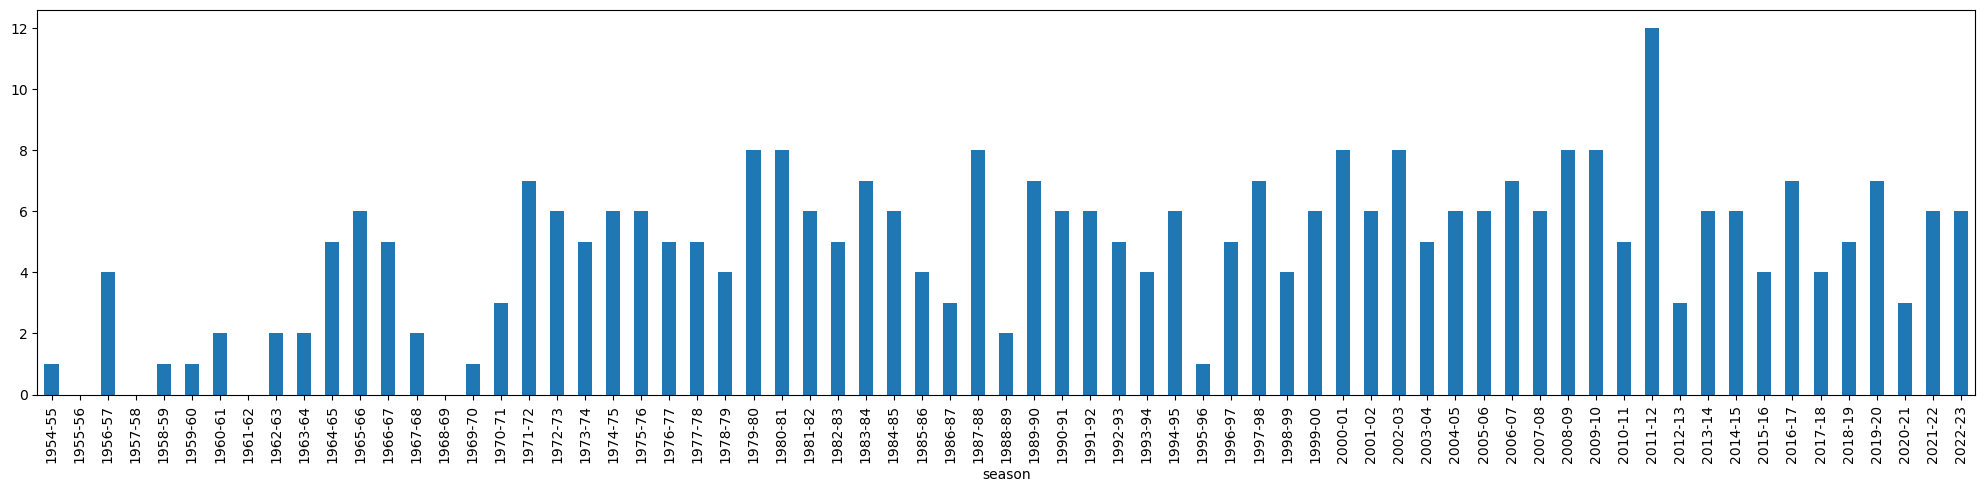

In [1215]:
dobryfotbal.plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

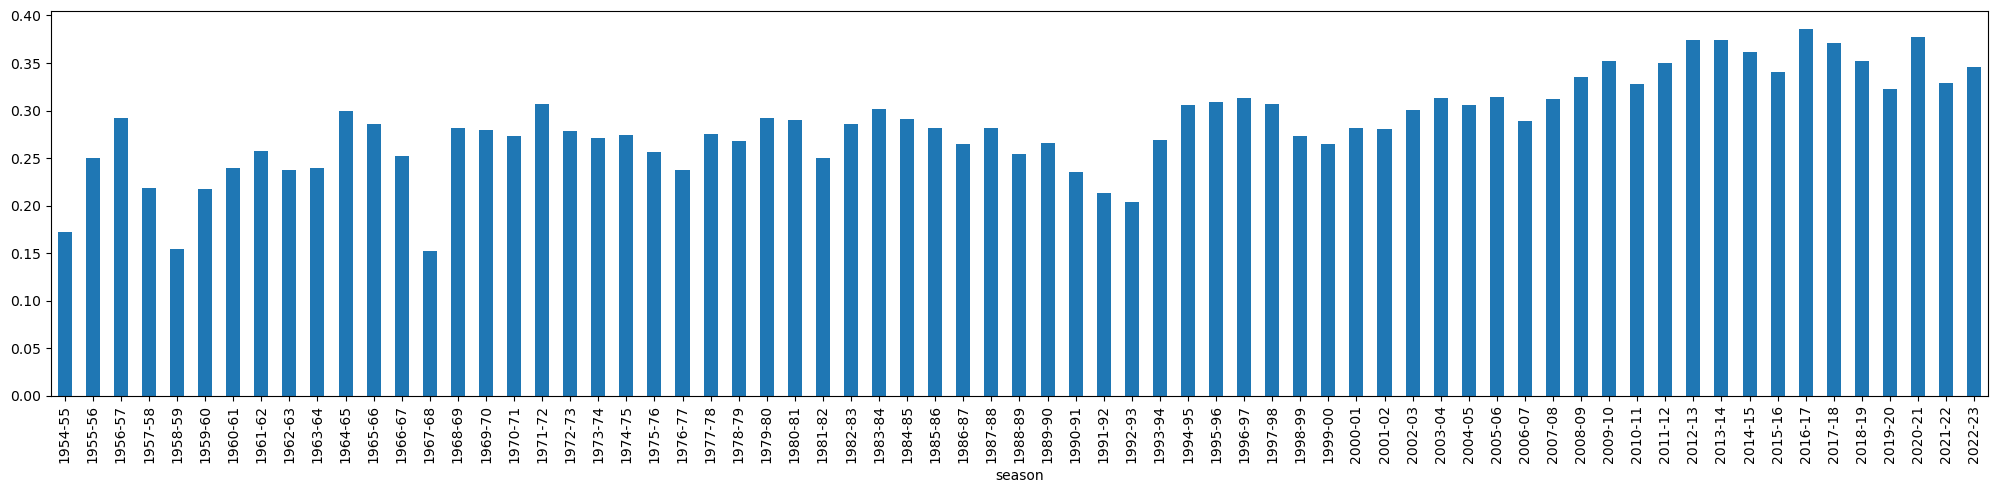

In [1216]:
pd.Series(east.groupby('season').size().reindex(allseasons[:-1]) / df.groupby('season').size().reindex(allseasons[:-1])).plot.bar(figsize=(25,5))

In [1217]:
vsechenfotbal = pd.Series(east.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

In [1218]:
fotbal_v_zapadni_ctyrce = pd.Series(four.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

<Axes: xlabel='season'>

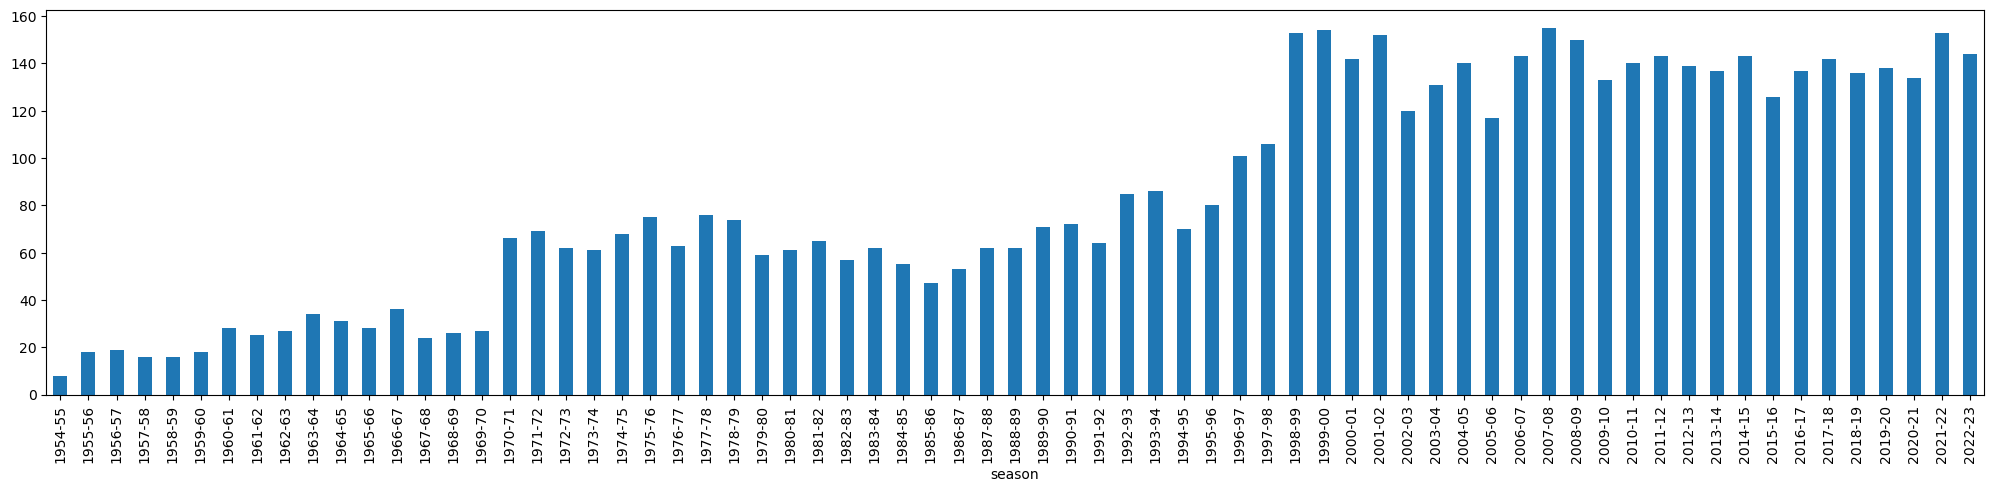

In [1219]:
fotbal_v_zapadni_ctyrce.plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

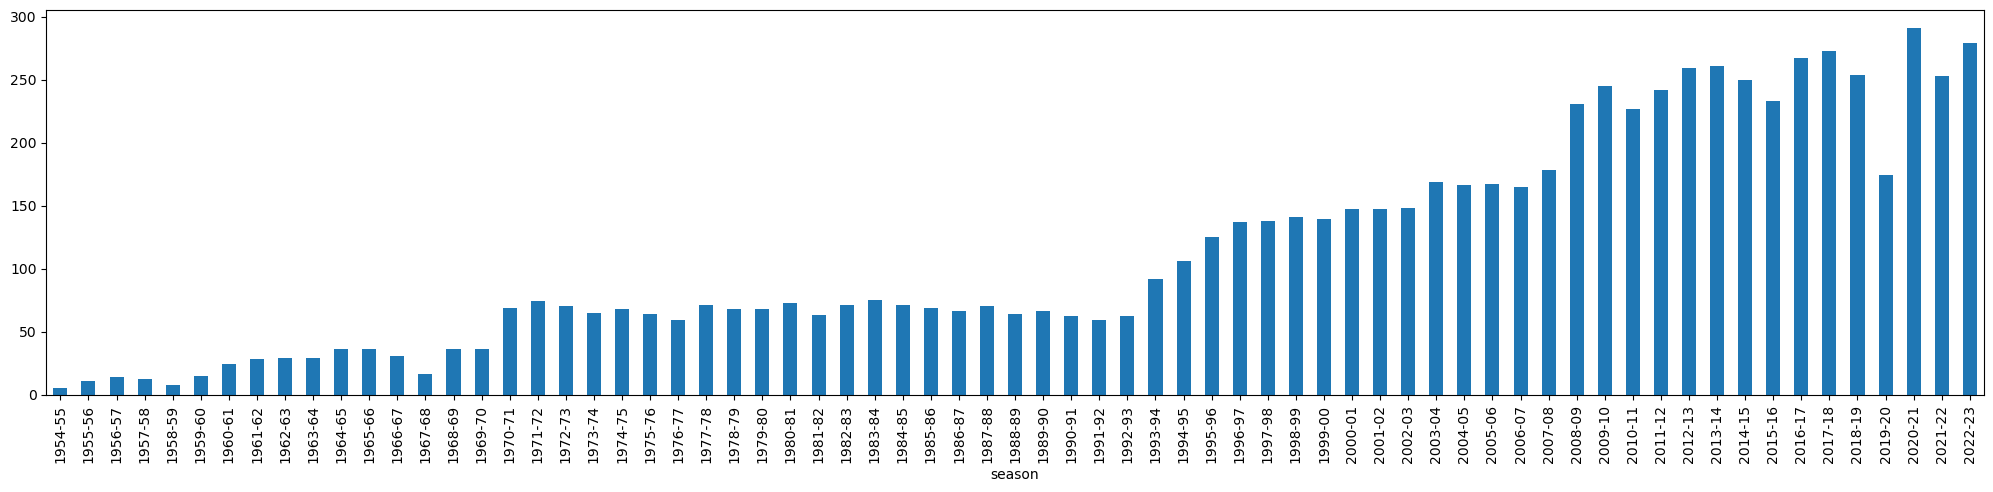

In [1220]:
vsechenfotbal.plot.bar(figsize=(25,5))

In [1221]:
irozhlas_graf(sloupcovy=[dobryfotbal], carovy=[vsechenfotbal], naproti = [dobryfotbal], osay="Celkem utkání", osay2="Utkání s top 8 týmy", target="vsecko", kredity=podpis, titulek="Domácí utkání východoevropských klubů ve všech kolech i předkolech evropských pohárů", barvy=["#ffee65","#fd7f6f"])

Graf uložen.


## Still looking for errors

In [1222]:
df[(df['competition'] == 'CWC') & (df['season'] == '1961-62')].head(50)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
63,CWC,1963-05-15,5-1,Tottenham Hotspur,England,Tottenham_Hotspur_F.C.,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Feijenoord Stadion, Rotterdam",final,49000.000,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Rotterdam,2.0,Tottenham,Hotspur
64,CWC,1962-10-18,0-0,Saint-Étienne,France,AS_Saint-%C3%89tienne,Nürnberg,West Germany,1._FC_N%C3%BCrnberg,"Stade Geoffroy-Guichard, Saint-Étienne",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Saint-Étienne,17.0,Saint-Étienne,Saint-Étienne
65,CWC,1962-10-24,4-0,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,Hibernians,Malta,Hibernians_F.C.,"Estadio Metropolitano, Madrid",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Madrid,17.0,Atlético,Madrid
66,CWC,1962-10-24,0-4,Shamrock Rovers,Republic of Ireland,Shamrock_Rovers_F.C.,Botev Plovdiv,Bulgaria,PFC_Botev_Plovdiv,"Dalymount Park, Dublin",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Dublin,17.0,Shamrock,Rovers
67,CWC,1962-10-30,1-1,Graz,Austria,Grazer_AK,Boldklubben 1909,Denmark,Boldklubben_1909,"Liebenauer Stadium, Graz",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Graz,17.0,Graz,Graz
68,CWC,1962-10-31,5-2,Tottenham Hotspur,England,Tottenham_Hotspur_F.C.,Rangers,Scotland,Rangers_F.C.,"White Hart Lane, Tottenham",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Tottenham,17.0,Tottenham,Hotspur
69,CWC,1962-11-07,0-1,Hibernians,Malta,Hibernians_F.C.,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Empire Stadium (Gżira), Gżira",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Gżira,17.0,Hibernians,Hibernians
70,CWC,1962-11-07,5-1,OFK Beograd,Socialist Federal Republic of Yugoslavia,OFK_Beograd,Portadown,Northern Ireland,Portadown_F.C.,"Omladinski stadion, Belgrade",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Belgrade,17.0,OFK,Beograd
71,CWC,1962-11-14,5-3,Boldklubben 1909,Denmark,Boldklubben_1909,Graz,Austria,Grazer_AK,"Odense Stadium, Odense",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Odense,17.0,Boldklubben,1909
72,CWC,1962-11-14,1-0,Botev Plovdiv,Bulgaria,PFC_Botev_Plovdiv,Shamrock Rovers,Republic of Ireland,Shamrock_Rovers_F.C.,"Stadion Plovdiv, Plovdiv",first round,NaN,NaN,1962%E2%80%9363 European Cup Winners%27 Cup,1961-62,Plovdiv,17.0,Botev,Plovdiv


In [1223]:
east[(east['competition'] == 'CWC') & (east['season'] == '1960-61')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,estimatedDate,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
25,CWC,1961-11-08,2-0,FK Vardar,Socialist Federal Republic of Yugoslavia,FK_Vardar,Dunfermline Athletic,Scotland,Dunfermline_Athletic_F.C.,"Gradski Stadion, Skopje",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Skopje,16.0,FK,Vardar
30,CWC,1961-11-29,3-1,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,Ajax,Netherlands,AFC_Ajax,"Népstadion, Budapest",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Budapest,16.0,Újpest,Dózsa
31,CWC,1961-11-30,1-0,Dynamo Žilina,Czechoslovakia,M%C5%A0K_%C5%BDilina,Olympiacos,Greece,Olympiacos_F.C.,"Štadión pod Dubňom, Žilina",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Žilina,16.0,Dynamo,Žilina
32,CWC,1961-11-30,0-1,Progresul București,Romania,AS_Progresul_Bucure%C8%99ti,Leixões,Portugal,Leix%C3%B5es_S.C.,"Stadionul 23 August, Bucharest",first round,40000.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Bucharest,16.0,Progresul,București
33,CWC,1961-12-17,7-0,Motor Jena,East Germany,FC_Carl_Zeiss_Jena,Alliance Dudelange,Luxembourg,Alliance_Dudelange,"Ernst-Abbe-Sportfeld, Jena",first round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Jena,16.0,Motor,Jena
43,CWC,1961-09-27,2-5,Spartak Varna,Bulgaria,PFC_Spartak_1918,Rapid Wien,Austria,SK_Rapid_Wien,"Yuri Gagarin Stadium, Varna",preliminary round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Varna,23.0,Spartak,Varna
45,CWC,1961-09-27,10-2,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,Floriana,Malta,Floriana_F.C.,"Népstadion, Budapest",preliminary round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Budapest,23.0,Újpest,Dózsa
48,CWC,1961-10-18,5-1,Motor Jena,East Germany,FC_Carl_Zeiss_Jena,Swansea Town,Wales,Swansea_City_A.F.C.,"Ernst-Abbe-Sportfeld, Jena",preliminary round,NaN,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Jena,23.0,Motor,Jena
52,CWC,1962-03-28,0-1,Motor Jena,East Germany,FC_Carl_Zeiss_Jena,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Ernst-Abbe-Sportfeld, Jena",semi-finals,27500.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Jena,4.0,Motor,Jena
54,CWC,1962-04-11,0-1,Újpest Dózsa,Hungary,%C3%9Ajpest_FC,Fiorentina,Italy,ACF_Fiorentina,"Megyeri úti stadion, Budapest",semi-finals,21277.0,NaN,1961%E2%80%9362 European Cup Winners%27 Cup,1960-61,Budapest,4.0,Újpest,Dózsa
